# **Trabajo Final Integrador - trIAge - 2024**

- Camila Victoria Sobrino
- Cecilia Belen Perez Colasanto
- José María Klappenbach

## **FASE 2: Ingesta y Almacenamiento de datos**

Guardamos el dataset en un bucket de GCP y lo conectamos con Colab

In [ ]:
!pip install google-cloud-storage


In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.cloud import storage
client = storage.Client()

In [ ]:
import pandas as pd
from io import BytesIO

bucket_name = 'df_triage'
file_name = 'df_triage.csv'

bucket = client.get_bucket(bucket_name)
blob = bucket.blob(file_name)

content = blob.download_as_bytes()

#Leer el CSV en un DataFrame
df = pd.read_csv(BytesIO(content), encoding='ISO-8859-1', delimiter=';')

#Mostrar las primeras filas del DataFrame
df.head()

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,...,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
0,2,2,71,3,3,2,right ocular pain,1,1,2,...,36.6,100,2,Corneal abrasion,1,4,2,86,"5,00",1
1,1,1,56,12,3,2,right forearm burn,1,1,2,...,36.5,NaN,4,"Burn of hand, firts degree dorsum",1,5,4,64,"3,95",1
2,2,1,68,8,2,2,"arm pain, Lt",1,1,2,...,36.6,98,4,"Fracture of surgical neck of humerus, closed",2,5,4,862,"1,00",1
3,1,2,71,8,1,1,ascites tapping,1,1,3,...,36.5,NaN,4,Alcoholic liver cirrhosis with ascites,1,5,6,108,"9,83",1
4,1,2,58,4,3,1,"distension, abd",1,1,3,...,36.5,NaN,4,Ascites,1,5,8,109,"6,60",1


In [ ]:
duplicates = df.duplicated()
duplicate_rows = df[duplicates]
duplicate_rows

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,...,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage


## **FASE 3: Procesamiento Y Transformación**

In [ ]:
df.shape

(1267, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Group                     1267 non-null   int64 
 1   Sex                       1267 non-null   int64 
 2   Age                       1267 non-null   int64 
 3   Patients number per hour  1267 non-null   int64 
 4   Arrival mode              1267 non-null   int64 
 5   Injury                    1267 non-null   int64 
 6   Chief_complain            1267 non-null   object
 7   Mental                    1267 non-null   int64 
 8   Pain                      1267 non-null   int64 
 9   NRS_pain                  1267 non-null   object
 10  SBP                       1267 non-null   object
 11  DBP                       1267 non-null   object
 12  HR                        1267 non-null   object
 13  RR                        1267 non-null   object
 14  BT                      

In [ ]:
df.columns

Index(['Group', 'Sex', 'Age', 'Patients number per hour', 'Arrival mode',
       'Injury', 'Chief_complain', 'Mental', 'Pain', 'NRS_pain', 'SBP', 'DBP',
       'HR', 'RR', 'BT', 'Saturation', 'KTAS_RN', 'Diagnosis in ED',
       'Disposition', 'KTAS_expert', 'Error_group', 'Length of stay_min',
       'KTAS duration_min', 'mistriage'],
      dtype='object')

###Variables categóricas:

In [ ]:
df["Group"].value_counts()

,count
Group,
1,688
2,579


In [ ]:
df['Group'] = df['Group'].replace({1: "Local ED 3rd Degree", 2: "Regional ED 4th Degree"})

In [ ]:
df["Sex"].value_counts()

,count
Sex,
2,661
1,606


In [ ]:
df['Sex'] = df['Sex'].replace({1: "Female", 2: "Male"})

In [ ]:
df["Arrival mode"].value_counts()

,count
Arrival mode,
3,753
2,266
4,155
1,79
6,10
5,2
7,2


In [ ]:
df['Arrival mode'] = df['Arrival mode'].replace({1: "Walking", 2: "Public Ambulance", 3:"Private Vehicle", 4: "Private Ambulance", 5: "Other", 6: "Other", 7: "Other"})

Tranformamos esta columna para englobar todas aquellas categorías de "otros"

In [ ]:
df["Arrival mode"].value_counts()

,count
Arrival mode,
Private Vehicle,753
Public Ambulance,266
Private Ambulance,155
Walking,79
Other,14


In [ ]:
df["Injury"].value_counts()

,count
Injury,
1,1023
2,244


In [ ]:
df['Injury'] = df['Injury'].replace({1: "Yes", 2: "No"})

In [ ]:
df["Chief_complain"].value_counts()

,count
Chief_complain,
abd pain,72
dyspnea,60
dizziness,59
fever,45
ant. chest pain,44
...,...
Throat Pain,1
facial painful swelling,1
toe pain,1


Mantenemos la columna así para luego aplicarle NLP

In [ ]:
df["Mental"].value_counts()

,count
Mental,
1,1187
2,39
3,28
4,13


In [ ]:
df['Mental'] = df['Mental'].replace({1: "Alert", 2: "Verbol Response", 3:"Pain Response", 4:"Unresponse"})

In [ ]:
df["Pain"].value_counts()

,count
Pain,
1,714
0,553


In [ ]:
df['Pain'] = df['Pain'].replace({1: "Yes", 0: "No"})

In [ ]:
df["KTAS_RN"].value_counts()

,count
KTAS_RN,
4,501
3,447
2,214
5,87
1,18


In [ ]:
df['KTAS_RN'] = df['KTAS_RN'].replace({1: "Resuscitation", 2: "Emergent", 3:"Urgent", 4:"Less Urgent", 5:"Non Urgent"})

In [ ]:
df["KTAS_expert"].value_counts()

,count
KTAS_expert,
3,487
4,459
2,220
5,75
1,26


In [ ]:
df['KTAS_expert'] = df['KTAS_expert'].replace({1: "Resuscitation", 2: "Emergent", 3:"Urgent", 4:"Less Urgent", 5:"Non Urgent"})

In [ ]:
df['Diagnosis in ED'].value_counts()

,count
Diagnosis in ED,
Acute gastroenteritis,49
Headache,26
Unspecified abdominal pain,23
Ischaemic chest pain,21
Dizziness,20
...,...
"Crohns disease, unspecified, unspecified",1
Multiple fracture of metacarpal bone closed,1
Primary dysmenorrhea,1


NLP a esto también para analizar correspondencia de sintoma con diagnóstico

In [ ]:
df['Disposition'].value_counts()

,count
Disposition,
1,797
2,373
5,32
4,26
7,22
6,9
3,8


In [ ]:
df['Disposition'] = df['Disposition'].replace({1: "Dischange", 2: "Admission to ward", 3:"Admission to ICU", 4:"Discharge", 5:"Transfer", 6: "Death", 7: "Surgery"})

In [ ]:
df['Error_group'].value_counts()

,count
Error_group,
0,1081
4,64
2,47
1,22
5,13
6,9
8,9
7,9
9,7


In [ ]:
#df['Error_group'] = df['Error_group'].replace({0: "No specified", 1: "Vital signs", 2:"Symptom", 3:"Psychological", 4:"Pain Scale", 5: "Mental state", 6: "sympton onset", 7: "transfer notes", 8: "Underlying discease", 9:"Other"})

No podemos identificar la correspondiente categoria para aquellos 3 numeros que suman 9. Igualmente esta columna no es parte del modelo ya que es consecuencia de la clasificación de urgencia.

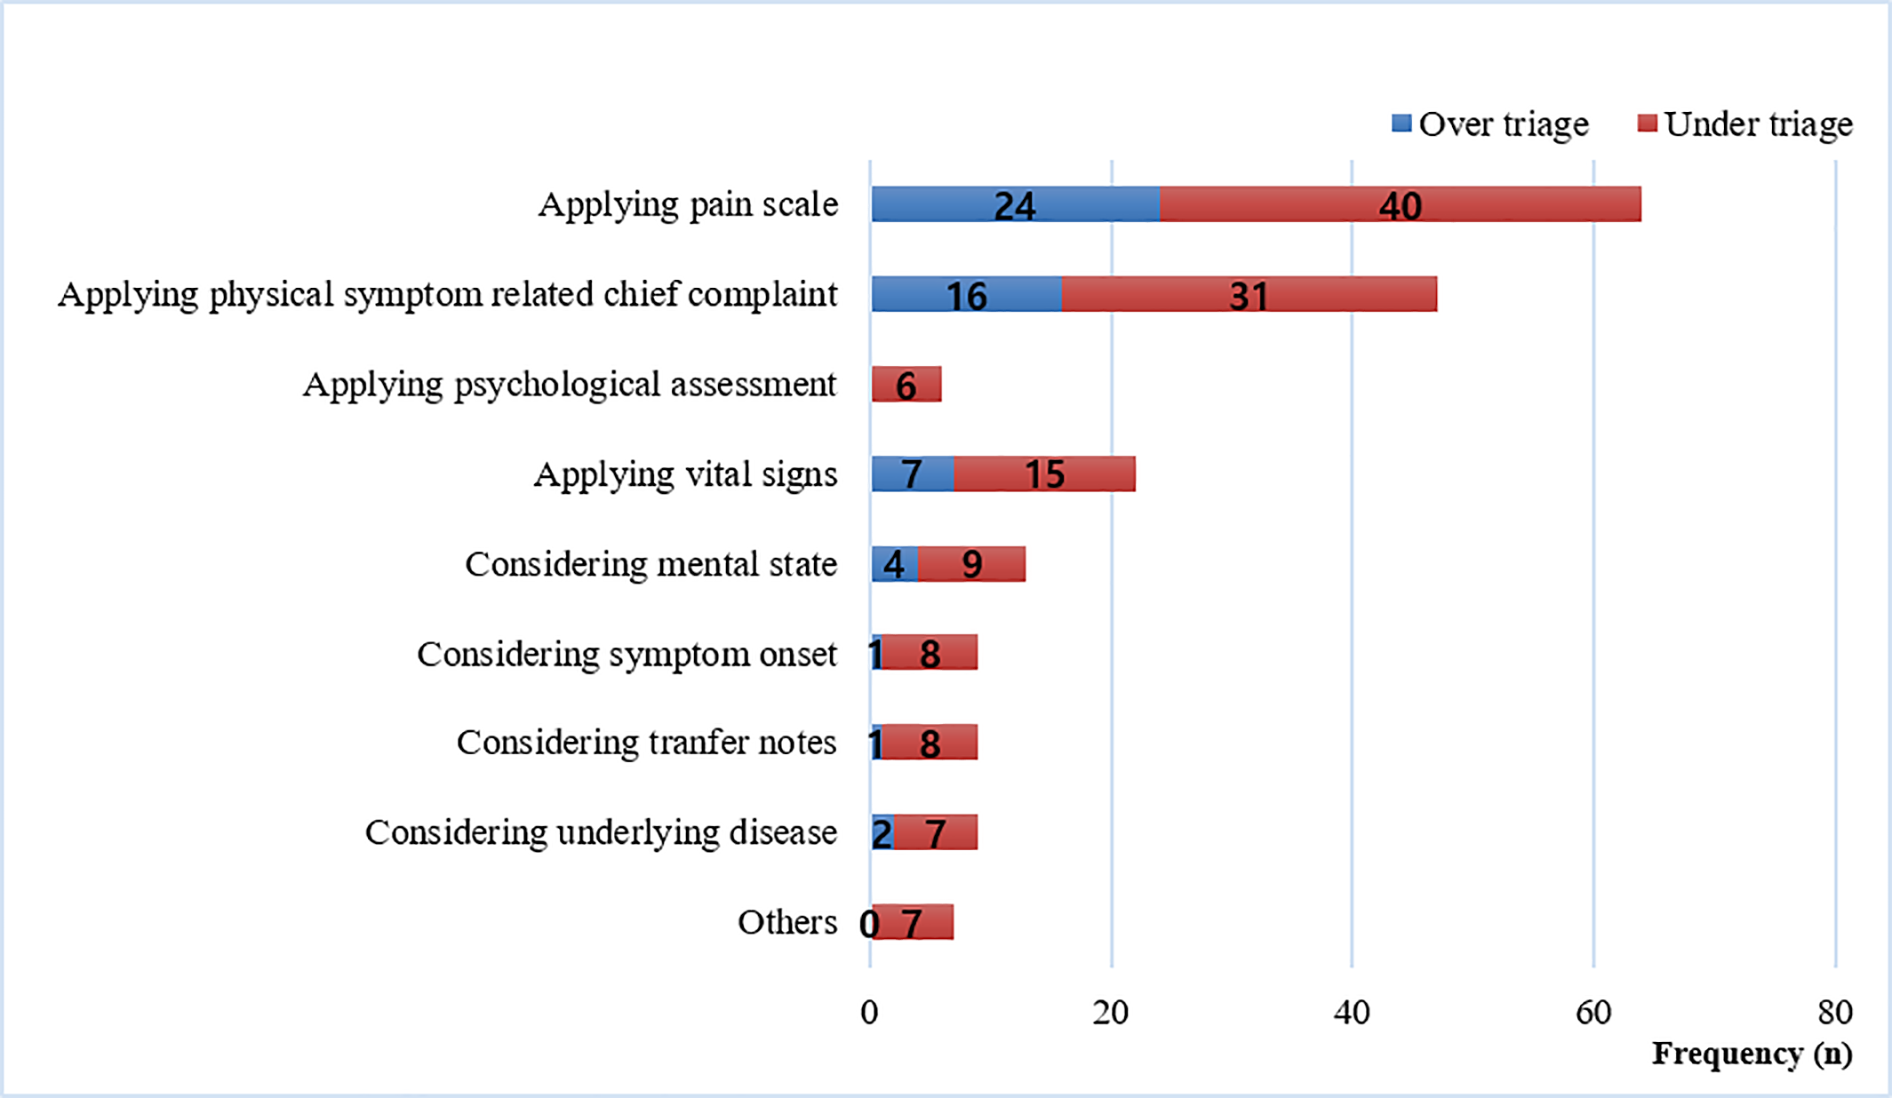


In [ ]:
df['mistriage'].value_counts()

,count
mistriage,
0,1081
2,131
1,55


In [ ]:
df['mistriage'] = df['mistriage'].replace({0: "No error",1: "Over triage", 2: "Under triage"})

In [ ]:
cat_variables = ["mistriage", "Disposition",  "KTAS_RN", "KTAS_expert", "Group", "Sex", "Mental", "Arrival mode", "Pain", "Injury"]
asis_variables = ["Diagnosis in ED", "Chief_complain", "Error_group"]
num_variables = [col for col in df.columns if col not in cat_variables + asis_variables]

In [ ]:
df

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,...,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
0,Regional ED 4th Degree,Male,71,3,Private Vehicle,No,right ocular pain,Alert,Yes,2,...,36.6,100,Emergent,Corneal abrasion,Dischange,Less Urgent,2,86,"5,00",Over triage
1,Local ED 3rd Degree,Female,56,12,Private Vehicle,No,right forearm burn,Alert,Yes,2,...,36.5,NaN,Less Urgent,"Burn of hand, firts degree dorsum",Dischange,Non Urgent,4,64,"3,95",Over triage
2,Regional ED 4th Degree,Female,68,8,Public Ambulance,No,"arm pain, Lt",Alert,Yes,2,...,36.6,98,Less Urgent,"Fracture of surgical neck of humerus, closed",Admission to ward,Non Urgent,4,862,"1,00",Over triage
3,Local ED 3rd Degree,Male,71,8,Walking,Yes,ascites tapping,Alert,Yes,3,...,36.5,NaN,Less Urgent,Alcoholic liver cirrhosis with ascites,Dischange,Non Urgent,6,108,"9,83",Over triage
4,Local ED 3rd Degree,Male,58,4,Private Vehicle,Yes,"distension, abd",Alert,Yes,3,...,36.5,NaN,Less Urgent,Ascites,Dischange,Non Urgent,8,109,"6,60",Over triage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,Regional ED 4th Degree,Male,79,5,Public Ambulance,Yes,mental change,Alert,No,#BOÞ!,...,36.4,95,Emergent,Cerebral infarction due to unspecified occlusi...,Admission to ward,Emergent,0,1995,"3,00",No error
1263,Regional ED 4th Degree,Male,81,2,Private Vehicle,Yes,dysuria,Alert,No,#BOÞ!,...,36.4,97,Less Urgent,Dysuria,Dischange,Less Urgent,0,1000,"2,00",No error
1264,Regional ED 4th Degree,Male,81,17,Public Ambulance,Yes,dizziness,Alert,No,#BOÞ!,...,36.2,99,Urgent,Dizziness and giddiness,Dischange,Urgent,0,310,"4,00",No error
1265,Regional ED 4th Degree,Female,81,2,Public Ambulance,No,"Sensory, Decreased",Alert,No,#BOÞ!,...,36.6,98,Urgent,"Cord compression, unspecified",Surgery,Urgent,0,475,"5,00",No error


In [ ]:
df[cat_variables].isnull().sum()

,0
mistriage,0
Disposition,0
KTAS_RN,0
KTAS_expert,0
Group,0
Sex,0
Mental,0
Arrival mode,0
Pain,0
Injury,0


In [ ]:
df[asis_variables].isna().sum()

,0
Diagnosis in ED,2
Chief_complain,0
Error_group,0


In [ ]:
df['Diagnosis in ED'].fillna("Desconocido", inplace=True)

<ipython-input-38-883d123f387a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Diagnosis in ED'].fillna("Desconocido", inplace=True)


###Variables numéricas

In [ ]:
num_variables

['Age',
 'Patients number per hour',
 'NRS_pain',
 'SBP',
 'DBP',
 'HR',
 'RR',
 'BT',
 'Saturation',
 'Length of stay_min',
 'KTAS duration_min']

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df["SBP"].value_counts(dropna=False))

SBP
120    125
110    117
140     89
100     84
130     79
150     48
160     36
??      25
137     17
136     14
149     14
141     13
138     13
180     13
170     12
90      12
124     12
132     12
119     12
129     11
143     11
131     11
139     11
163     11
121     11
152     10
144     10
134     10
156     10
145     10
135      9
122      9
154      9
118      9
165      9
80       9
115      9
142      9
159      8
102      8
190      8
146      8
117      8
123      8
148      8
116      8
153      7
114      7
166      7
133      7
161      7
113      6
126      6
164      6
158      6
101      6
194      6
157      6
147      5
125      5
108      5
162      5
168      5
111      5
128      5
169      5
200      5
151      5
105      5
99       5
107      5
197      4
196      4
167      4
70       4
178      4
155      4
91       4
182      4
94       3
181      3
112      3
171      3
177      3
204      3
179      3
97       3
127      3
109      3
199      3
176   

Aca hay ??

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df["DBP"].value_counts(dropna=False))

DBP
80     184
70     137
60     118
100     94
90      90
??      29
77      23
76      22
72      20
71      19
78      19
73      17
87      17
85      17
75      17
81      16
97      16
86      16
65      16
66      15
79      15
69      15
84      15
82      15
89      15
94      14
92      13
74      13
63      13
83      12
96      12
64      11
88      11
101     10
68       9
67       9
95       8
98       8
106      7
102      7
105      7
93       7
110      6
62       6
99       6
50       6
109      6
58       5
91       5
54       5
61       5
40       5
55       5
103      4
104      4
111      4
45       4
56       4
115      3
112      3
108      3
57       3
107      3
59       2
120      2
44       2
33       2
131      1
136      1
31       1
123      1
130      1
154      1
116      1
114      1
47       1
52       1
117      1
53       1
119      1
122      1
160      1
36.      1
Name: count, dtype: int64


Aca hay ?? y un 36.

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df["HR"].value_counts(dropna=False))

HR
80     95
100    50
78     45
74     42
76     41
84     40
72     40
88     40
86     40
68     36
90     34
70     32
64     31
98     31
66     26
60     26
110    24
75     24
94     23
102    22
62     21
82     21
96     20
??     20
93     18
101    18
79     17
108    16
85     16
95     15
89     15
97     14
81     14
87     14
106    14
61     13
103    13
65     13
73     13
83     12
109    12
92     11
71     11
77     10
67     10
91      8
63      8
111     8
58      8
115     7
114     6
50      6
105     6
104     6
69      6
117     5
112     5
56      5
54      4
119     4
57      4
59      4
118     4
99      3
126     3
120     3
51      3
129     3
52      2
137     2
48      2
122     2
53      2
37      2
121     2
125     2
128     2
135     1
145     1
131     1
42      1
127     1
123     1
35      1
113     1
130     1
55      1
32      1
116     1
140     1
36      1
148     1
45      1
124     1
Name: count, dtype: int64


Aca hay ??

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df["RR"].value_counts(dropna=False))

RR
20    793
18    186
16    159
22     50
24     34
??     22
28     13
26      4
30      3
23      2
14      1
Name: count, dtype: int64


Aca hay ??

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df["BT"].value_counts(dropna=False))

BT
36.5    149
36.4    127
36.6    112
36      103
36.3    103
36.2    102
36.8     93
36.0     78
36.7     70
36.9     51
37       40
36.1     39
37.2     28
37.1     26
37.3     21
??       18
37.4     16
37.5     16
37.6     11
37.8      7
38.1      7
38.4      5
37.9      3
39.5      3
37.7      3
38        3
35.7      3
36.       3
38.2      3
35.5      2
37.0      2
38.6      2
38.3      2
38.7      2
38.5      2
35.6      2
41        1
39        1
35        1
38.8      1
35.9      1
38.0      1
39.8      1
39.3      1
39.4      1
35.8      1
Name: count, dtype: int64


Aca hay ??

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df["Saturation"].value_counts(dropna=False))

Saturation
NaN    688
98     228
99     109
97      91
96      48
95      25
100     22
94      15
??       9
93       6
90       6
92       5
91       3
88       2
86       2
89       1
68       1
78       1
76       1
85       1
80       1
20       1
74       1
Name: count, dtype: int64


Aca hay ??

In [ ]:
import numpy as np

columns_to_check = ['SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturation']
masks = [df[col].astype(str).str.contains('\?\?', na=False) for col in columns_to_check]
combined_mask = np.logical_or.reduce(masks)

In [ ]:
filtered_df = df[combined_mask]
filtered_df

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,...,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
61,Regional ED 4th Degree,Female,70,8,Public Ambulance,Yes,dyspnea,Verbol Response,Yes,3,...,36.3,78,Emergent,Dyspnoea,Death,Resuscitation,1,593,"2,00",Under triage
121,Local ED 3rd Degree,Male,48,5,Public Ambulance,Yes,dyspnea,Alert,No,#BOÞ!,...,??,NaN,Emergent,Dyspnea,Dischange,Resuscitation,1,272,"4,10",Under triage
122,Local ED 3rd Degree,Female,50,9,Private Vehicle,Yes,"Blood Pressure, Low",Pain Response,No,#BOÞ!,...,??,NaN,Emergent,Colitis,Admission to ICU,Resuscitation,1,496,"6,40",Under triage
123,Local ED 3rd Degree,Female,50,9,Private Vehicle,Yes,"Blood Pressure, Low",Pain Response,No,#BOÞ!,...,??,NaN,Emergent,Hypotension,Admission to ICU,Resuscitation,1,496,"6,40",Under triage
150,Local ED 3rd Degree,Male,77,4,Private Vehicle,Yes,mental change,Pain Response,No,#BOÞ!,...,??,NaN,Emergent,End stage kidney disease on dialysis,Admission to ward,Resuscitation,4,323,"13,90",Under triage
153,Regional ED 4th Degree,Male,65,7,Public Ambulance,No,mental change,Pain Response,No,#BOÞ!,...,36.0,94,Emergent,Traumatic subdural hemorrhage without open int...,Transfer,Resuscitation,5,150,"2,00",Under triage
155,Local ED 3rd Degree,Female,78,6,Public Ambulance,Yes,Motor weakness,Unresponse,No,#BOÞ!,...,??,NaN,Emergent,Dysarthria,Admission to ward,Resuscitation,5,234,"9,35",Under triage
161,Local ED 3rd Degree,Female,77,5,Private Ambulance,Yes,melena,Pain Response,No,#BOÞ!,...,37.4,NaN,Emergent,Hematochezia,Admission to ICU,Resuscitation,7,351,"4,42",Under triage
164,Regional ED 4th Degree,Female,80,7,Private Ambulance,Yes,dyspnea,Pain Response,No,#BOÞ!,...,36.6,??,Emergent,Dyspnoea,Transfer,Resuscitation,7,20098,"3,00",Under triage
180,Regional ED 4th Degree,Male,43,17,Private Vehicle,Yes,"erection, penile",Alert,No,#BOÞ!,...,??,??,Non Urgent,Priapism,Dischange,Emergent,2,594,"5,00",Under triage


In [ ]:
for column in columns_to_check:
    count_of_question_marks = (df[column].astype(str) == '??').sum()
    print(f"Column '{column}': Count of '??' = {count_of_question_marks}")

Column 'SBP': Count of '??' = 25
Column 'DBP': Count of '??' = 29
Column 'HR': Count of '??' = 20
Column 'RR': Count of '??' = 22
Column 'BT': Count of '??' = 18
Column 'Saturation': Count of '??' = 9


Estos sí los reemplazamos ya que son pocos valores. Agrupamos por clasificación de KTAS y si tuvo mistriage o no:

In [ ]:
for column in columns_to_check:
    df[column] = df[column].astype(str)
    df[column] = df.groupby(["mistriage", "KTAS_expert"])[column].transform(lambda x: x.replace('??', x.replace('??', np.nan).mode()[0]))
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [ ]:
for column in columns_to_check:
    count_of_question_marks = (df[column].astype(str) == '??').sum()
    print(f"Column '{column}': Count of '??' = {count_of_question_marks}")

Column 'SBP': Count of '??' = 0
Column 'DBP': Count of '??' = 0
Column 'HR': Count of '??' = 0
Column 'RR': Count of '??' = 0
Column 'BT': Count of '??' = 0
Column 'Saturation': Count of '??' = 0


KTAS duration_min tiene la coma como separador de decimales. Reemplazamos con punto:

In [ ]:
df['KTAS duration_min'] = df['KTAS duration_min'].apply(lambda x: int(float(str(x).replace(',', '.'))) if isinstance(x, str) else int(float(x)))

In [ ]:
missing_saturation = df[df['Saturation'].isnull()]

missing_counts = missing_saturation['KTAS_expert'].value_counts()

print("Distribución de valores nulos en Saturation por Nivel de Urgencia:")
print(missing_counts)

Distribución de valores nulos en Saturation por Nivel de Urgencia:
KTAS_expert
Less Urgent      278
Urgent           271
Emergent          73
Non Urgent        57
Resuscitation     18
Name: count, dtype: int64


In [ ]:
urgent_missing_saturation = missing_saturation[missing_saturation['KTAS_expert'] == "Urgent"]
result = urgent_missing_saturation[['Chief_complain', 'Diagnosis in ED']]

In [ ]:
result

,Chief_complain,Diagnosis in ED
7,"pain, chest",Acute coronary syndrome
22,skin rash,Anaphylaxis
29,Seizure Like Activity,Seizure
30,post seizure,Fracture of mandible open
32,palpitation,Paroxysmal supraventricular tachycardia
...,...,...
1198,dizziness,Dizziness
1199,dizziness,Dizziness
1204,dysarthria,Dysarthria
1207,dizziness,Dizziness


In [ ]:
chief_complain_counts = urgent_missing_saturation['Chief_complain'].value_counts()
diagnosis_counts = urgent_missing_saturation['Diagnosis in ED'].value_counts()

In [ ]:
chief_complain_counts

,count
Chief_complain,
abd pain,43
dizziness,28
dyspnea,14
epigastric pain,9
"pain, abdominal",8
...,...
backache,1
"pain, chest wall, Rt",1
sorethroat,1


In [ ]:
diagnosis_counts

,count
Diagnosis in ED,
Acute gastroenteritis,27
Dizziness,16
Ureter stone,8
Abdominal pain,7
Benign paroxysmal positional vertigo,6
...,...
Contusion of abdominal wall,1
Somatization disorder,1
Multiple abrasion,1


####Probamos si podemos predecir los valores faltantes de Saturación en base a las otras variables

In [ ]:
df["Saturation"].isnull().sum()

697

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression

train_data = df[df['Saturation'].notnull()]
test_data = df[df['Saturation'].isnull()]

num_variables_clean = [col for col in num_variables if col not in ["NRS_pain", "Saturation"]]
cat_variables_clean = [col for col in cat_variables if col not in ["NRS_pain", "Saturation"]]

ignore_cols = ["NRS_pain", "Chief_complain", "Diagnosis in ED"]

train_data = train_data.drop(columns=ignore_cols, errors="ignore")
test_data = test_data.drop(columns=ignore_cols, errors="ignore")

X_train = train_data.drop("Saturation", axis=1)
y_train = train_data['Saturation']
X_test = test_data.drop("Saturation", axis=1)

preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("scaler", StandardScaler())
    ]), num_variables_clean),
    ("cat", OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore"), cat_variables_clean)
])

pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", None)
])

param_grid = [
    {
        "model": [Ridge()],
        "preprocessor__num__poly__degree": [1, 2],
        "model__alpha": np.logspace(-3, 3, 10)
    },
    {
        "model": [ElasticNet()],
        "preprocessor__num__poly__degree": [1, 2],
        "model__alpha": np.logspace(-1, 3, 10),
        "model__l1_ratio": [0.5, 0.9]
    }
]

gscv = GridSearchCV(pipe, param_grid, scoring="r2", cv=5, n_jobs=-1)
gscv.fit(X_train, y_train)

predicted_values = gscv.predict(X_test)
test_data["Saturation"] = predicted_values
updated_df = pd.concat([train_data, test_data.copy()])

print("Mejores parámetros:", gscv.best_params_)
print("Mejor R² en entrenamiento:", gscv.best_score_)

Mejores parámetros: {'model': Ridge(), 'model__alpha': 1000.0, 'preprocessor__num__poly__degree': 2}
Mejor R² en entrenamiento: 0.014245614448442879


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (570, 20)
X_test shape: (697, 20)


In [ ]:
from sklearn.feature_selection import mutual_info_regression
importances = mutual_info_regression(X_train.select_dtypes(include="number"), y_train)
importances_df = pd.DataFrame({'Feature': X_train.select_dtypes(include="number").columns, 'Importance': importances})
print(importances_df.sort_values(by="Importance", ascending=False))

                    Feature  Importance
0                       Age    0.092079
5                        RR    0.056239
4                        HR    0.048645
1  Patients number per hour    0.015639
2                       SBP    0.011414
3                       DBP    0.000000
6                        BT    0.000000
7               Error_group    0.000000
8        Length of stay_min    0.000000
9         KTAS duration_min    0.000000


Vemos que las variables no son capaces de predecir los valores faltantes de Saturación. Una opción es imputarle el valor normal de 98% pero primero vamos a intentar agrupar por signos vitales para asignarle un valor más representativo a cada paciente. Lo haremos después de Feature Engineering

In [ ]:
#null_saturation = df['Saturation'].isnull()
#df.loc[null_saturation, 'Saturation'] = 98

In [ ]:
#df["Saturation"].isnull().any()

In [ ]:
df["NRS_pain"].value_counts()

,count
NRS_pain,
#BOÞ!,556
3,278
4,141
5,136
6,70
2,38
7,33
8,9
10,3


Esta columna en realidad tiene más del 40% de los datos tienen un error de cómputo. Debido al alto porcentaje, vamos a probar si, incluyendola el modelo mejora. Vamos a reemplazar con null aquellos valores #BOÞ!

In [ ]:
import numpy as np

df["NRS_pain"] = df["NRS_pain"].replace("#BOÞ!", np.nan)

In [ ]:
df["NRS_pain"].isnull().sum()

556

In [ ]:
# Filtrar datos para entrenamiento y prueba con base en NRS_pain
train_data = df[df['NRS_pain'].notnull()]
test_data = df[df['NRS_pain'].isnull()]

# Limpiar las listas de variables numéricas y categóricas
num_variables_clean = [col for col in num_variables if col not in ["NRS_pain", "Saturation"]]
cat_variables_clean = [col for col in cat_variables if col not in ["NRS_pain", "Saturation"]]

# Columnas a ignorar
ignore_cols = ["Saturation", "Chief_complain", "Diagnosis in ED"]

# Remover columnas irrelevantes
train_data = train_data.drop(columns=ignore_cols, errors="ignore")
test_data = test_data.drop(columns=ignore_cols, errors="ignore")

# Separar variables independientes (X) y dependientes (y)
X_train = train_data.drop("NRS_pain", axis=1)
y_train = train_data['NRS_pain']
X_test = test_data.drop("NRS_pain", axis=1)

# Preprocesamiento: numéricas y categóricas
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("scaler", StandardScaler())
    ]), num_variables_clean),
    ("cat", OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore"), cat_variables_clean)
])

# Pipeline con el modelo
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", None)
])

# Grid de hiperparámetros para los modelos
param_grid = [
    {
        "model": [Ridge()],
        "preprocessor__num__poly__degree": [1, 2],
        "model__alpha": np.logspace(-3, 3, 10)
    },
    {
        "model": [ElasticNet()],
        "preprocessor__num__poly__degree": [1, 2],
        "model__alpha": np.logspace(-1, 3, 10),
        "model__l1_ratio": [0.5, 0.9]
    }
]

# GridSearchCV para encontrar el mejor modelo y parámetros
gscv = GridSearchCV(pipe, param_grid, scoring="r2", cv=5, n_jobs=-1)
gscv.fit(X_train, y_train)

# Predecir valores nulos de NRS_pain
predicted_values = gscv.predict(X_test)
test_data["NRS_pain"] = predicted_values

# Combinar nuevamente los datos de entrenamiento y prueba
updated_df = pd.concat([train_data, test_data.copy()])

# Resultados
print("Mejores parámetros:", gscv.best_params_)
print("Mejor R² en entrenamiento:", gscv.best_score_)


Mejores parámetros: {'model': Ridge(), 'model__alpha': 215.44346900318823, 'preprocessor__num__poly__degree': 1}
Mejor R² en entrenamiento: -1.2048984307486095


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Da demasiado mal también. Ver de agrupar por sintoma e imputar un dolor parecido a uno que si tiene

Después de hacer clustering con NLP de síntomas vemos de imputar el dolor. Sino, podemos hacerlo igual que Saturation más adelante

In [ ]:
import pandas as pd

for variable in num_variables:
        df[variable] = pd.to_numeric(df[variable])
        min_value = df[variable].min()
        max_value = df[variable].max()

        print(f"Variable: {variable}")
        print(f"  Minimum: {min_value}")
        print(f"  Maximum: {max_value}")
        print("-" * 20)

Variable: Age
  Minimum: 16
  Maximum: 96
--------------------
Variable: Patients number per hour
  Minimum: 1
  Maximum: 17
--------------------
Variable: NRS_pain
  Minimum: 1.0
  Maximum: 10.0
--------------------
Variable: SBP
  Minimum: 50
  Maximum: 275
--------------------
Variable: DBP
  Minimum: 31.0
  Maximum: 160.0
--------------------
Variable: HR
  Minimum: 32
  Maximum: 148
--------------------
Variable: RR
  Minimum: 14
  Maximum: 30
--------------------
Variable: BT
  Minimum: 35.0
  Maximum: 41.0
--------------------
Variable: Saturation
  Minimum: 20.0
  Maximum: 100.0
--------------------
Variable: Length of stay_min
  Minimum: 0
  Maximum: 709510
--------------------
Variable: KTAS duration_min
  Minimum: 1
  Maximum: 17
--------------------


In [ ]:
df[num_variables].isnull().sum()

,0
Age,0
Patients number per hour,0
NRS_pain,556
SBP,0
DBP,0
HR,0
RR,0
BT,0
Saturation,697
Length of stay_min,0


Esta e sotra opción, pero primero evaluaremos agrupar por signos vitales.

In [ ]:
#df["NRS_pain"] = df.groupby(["mistriage", "KTAS_expert"])["NRS_pain"].transform(lambda x: x.fillna(x.mode()[0]))
#df["Saturation"] = df.groupby(["mistriage", "KTAS_expert"])["Saturation"].transform(lambda x: x.fillna(x.mode()[0]))

In [ ]:
for column in columns_to_check:
    print(f"Column: {column}, Data type: {df[column].dtype}")

Column: SBP, Data type: int64
Column: DBP, Data type: float64
Column: HR, Data type: int64
Column: RR, Data type: int64
Column: BT, Data type: float64
Column: Saturation, Data type: float64


In [ ]:
for column in columns_to_check:
  if df[column].isin([0]).any():
    print(f"Column '{column}' contains 0 values.")
  else:
    print(f"Column '{column}' does not contain 0 values.")

Column 'SBP' does not contain 0 values.
Column 'DBP' does not contain 0 values.
Column 'HR' does not contain 0 values.
Column 'RR' does not contain 0 values.
Column 'BT' does not contain 0 values.
Column 'Saturation' does not contain 0 values.


Esto es algo positivo ya que si habia algun valor 0 en estas columnas, mostraba una mala medición.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplot(df):
    num_cols_len = len(columns_to_check)
    rows = int(num_cols_len / 2) if num_cols_len % 2 == 0 else int(num_cols_len / 2) + 1
    fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(10, rows * 4))
    for i, col in enumerate(columns_to_check):
        sns.boxplot(x=col, data=df, ax=axes[int(i/2), i%2], color="green")
        axes[int(i/2), i%2].set_title(f"Boxplot de {col}")
    plt.tight_layout()
    plt.show()

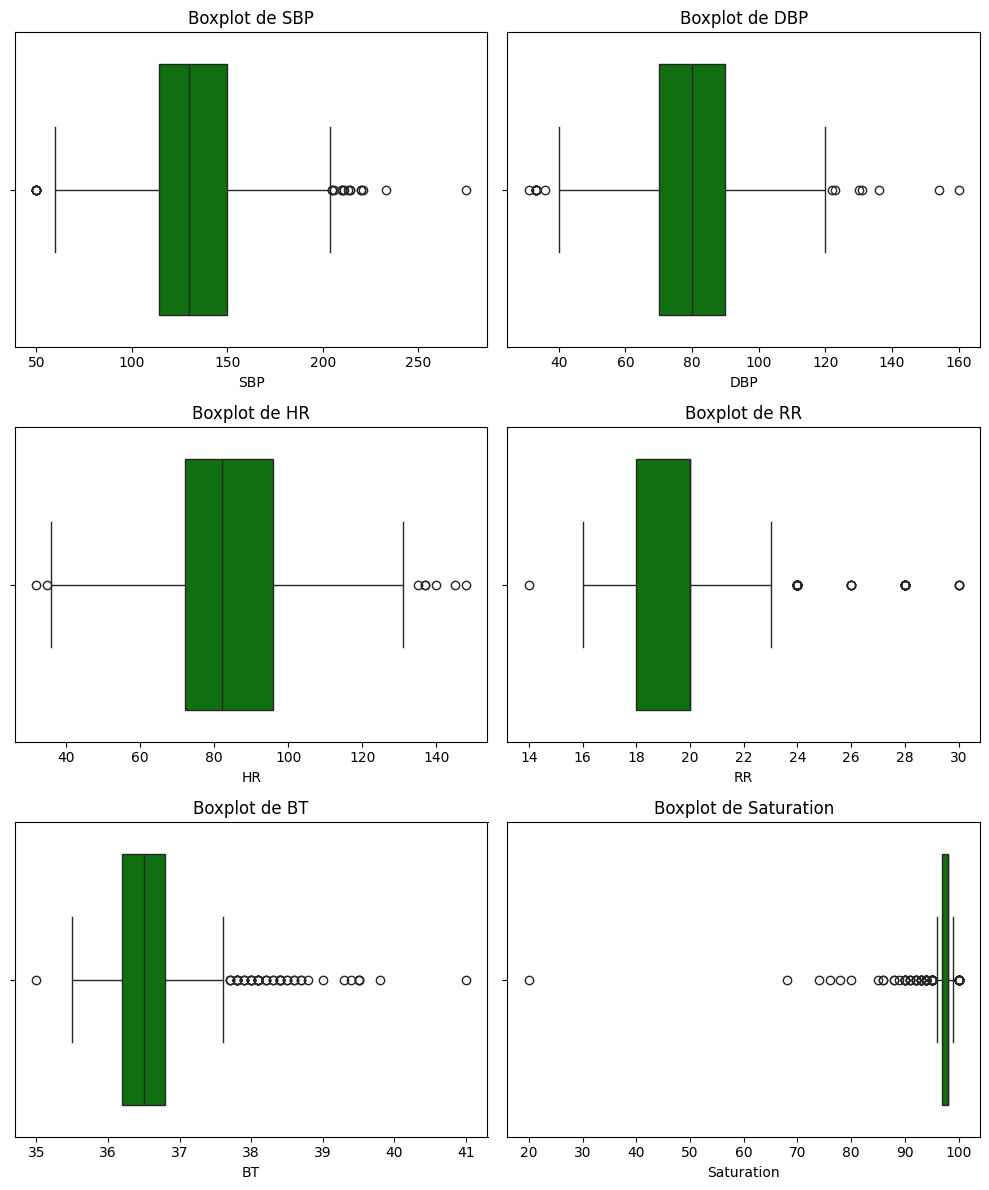

In [ ]:
plot_boxplot(df)
plt.show()

Se consultó a un médico los valores que realmente son irreales:

In [ ]:
# Condiciones para identificar outliers en cada columna
outlier_conditions = (
    (df['SBP'] < 80) | (df['SBP'] > 220) |  # Presión Sistólica
    (df['DBP'] < 50) | (df['DBP'] > 110) |  # Presión Diastólica
    (df['HR'] < 30) | (df['HR'] > 150) |   # Frecuencia Cardíaca
    (df['RR'] < 12) | (df['RR'] > 30) |    # Frecuencia Respiratoria
    (df['BT'] < 35) | (df['BT'] > 41) |    # Temperatura Corporal
    (df['Saturation'] < 60) | (df['Saturation'] > 100)  # Saturación
)

# Filtrar las filas con outliers
outliers = df[outlier_conditions]


In [ ]:
outlier_counts = {
    'SBP': df[(df['SBP'] < 80) | (df['SBP'] > 220)].shape[0],
    'DBP': df[(df['DBP'] < 50) | (df['DBP'] > 110)].shape[0],
    'HR': df[(df['HR'] < 30) | (df['HR'] > 150)].shape[0],
    'RR': df[(df['RR'] < 12) | (df['RR'] > 30)].shape[0],
    'BT': df[(df['BT'] < 35) | (df['BT'] > 41)].shape[0],
    'Saturation': df[(df['Saturation'] < 60) | (df['Saturation'] > 100)].shape[0],
}

print("Cantidad de outliers por columna:")
print(outlier_counts)


Cantidad de outliers por columna:
{'SBP': 19, 'DBP': 45, 'HR': 0, 'RR': 0, 'BT': 0, 'Saturation': 1}


In [ ]:
outliers.shape[0]

50

Ya que estos casos son realmente irreales (es decir, no solo sale del rango normal de una persona sana, sino también sale del rango anormal de una persona enferma). Por eso, imputamos la mediana, pero antes agrupando por diagnóstico de KTAS y si fue bien diagnosticado, sobre o sub diagnosticado.

In [ ]:
for column in outliers[['SBP', 'DBP', 'Saturation']]:
    # Calculate the median for each group
    group_medians = df.groupby(['mistriage', 'KTAS_expert'])[column].transform('median')

    # Conditions for identifying outliers in the current column
    outlier_condition = (
        (column == 'SBP' and ((df['SBP'] < 80) | (df['SBP'] > 220))) |
        (column == 'DBP' and ((df['DBP'] < 50) | (df['DBP'] > 110))) |
        (column == 'Saturation' and ((df['Saturation'] < 60) | (df['Saturation'] > 100)))
    )

    # Replace outliers with the group medians
    df.loc[outlier_condition, column] = group_medians[outlier_condition]

In [ ]:
# Condiciones para identificar outliers en cada columna
outlier_conditions = (
    (df['SBP'] < 80) | (df['SBP'] > 220) |  # Presión Sistólica
    (df['DBP'] < 50) | (df['DBP'] > 110) |  # Presión Diastólica
    (df['HR'] < 30) | (df['HR'] > 150) |   # Frecuencia Cardíaca
    (df['RR'] < 12) | (df['RR'] > 30) |    # Frecuencia Respiratoria
    (df['BT'] < 35) | (df['BT'] > 41) |    # Temperatura Corporal
    (df['Saturation'] < 60) | (df['Saturation'] > 100)  # Saturación
)

# Filtrar las filas con outliers
outliers = df[outlier_conditions]

In [ ]:
outliers.shape[0]

9

Seguimos teniendo outliers (irreales):

In [ ]:
outliers[["SBP", "DBP", "Saturation"]]

,SBP,DBP,Saturation
61,50,33.0,78.0
121,50,33.0,NaN
122,50,33.0,NaN
123,50,33.0,NaN
133,50,33.0,NaN
150,50,33.0,NaN
153,50,33.0,94.0
155,50,33.0,NaN
161,50,33.0,NaN


In [ ]:
df.loc[61, ['SBP', 'DBP', 'Saturation']]

,61
SBP,50
DBP,33.0
Saturation,78.0


Nos quedamos con el siguiente rango, haciendo uso de los quantiles:

In [ ]:
for column in ['SBP', 'DBP', 'Saturation']:
    # Set lower and upper bounds (adjust based on your domain knowledge)
    lower_bound = df[column].quantile(0.05)  # 5th percentile
    upper_bound = df[column].quantile(0.95)  # 95th percentile

    # Clip values outside the bounds
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

In [ ]:
# Condiciones para identificar outliers en cada columna
outlier_conditions = (
    (df['SBP'] < 80) | (df['SBP'] > 220) |  # Presión Sistólica
    (df['DBP'] < 50) | (df['DBP'] > 110) |  # Presión Diastólica
    (df['HR'] < 30) | (df['HR'] > 150) |   # Frecuencia Cardíaca
    (df['RR'] < 12) | (df['RR'] > 30) |    # Frecuencia Respiratoria
    (df['BT'] < 35) | (df['BT'] > 41) |    # Temperatura Corporal
    (df['Saturation'] < 60) | (df['Saturation'] > 100)  # Saturación
)

# Filtrar las filas con outliers
outliers = df[outlier_conditions]

In [ ]:
outliers.shape[0]

0

Esto quiere decir, que todos los otros valores de outliers fuera del rango especificado arriba como irreal, los mantendremos como tal ya que una persona que padece alguna enfermedad puede tenerlos. En la parte de feature engineering especificaremos estas condiciones. Los outliers irreales los reemplazamos con la mediana, agrupando por KTAS_expert y mistriage

In [ ]:
df.loc[61, ['SBP', 'DBP', 'Saturation']]

,61
SBP,100
DBP,60.0
Saturation,93.0


Después de feature engineering, vamos a agrupar por otros signos vitales, ejemplo, taquicardia, bradicardia, normal, etc. para sacar la mediana de la saturación de ese grupo e imputarlo a los nulos.

###Feature Engineering

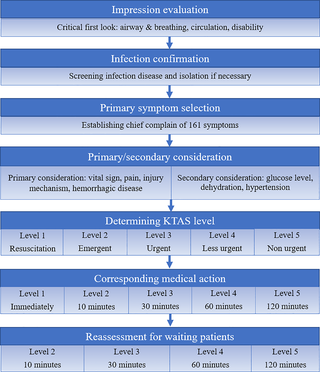


In [ ]:
df["KTAS_nurse_global"] = df["KTAS_RN"].replace({"Resuscitation": "Urgent", "Emergent": "Urgent", "Urgent": "Urgent", "Less Urgent": "Non Urgent", "Non Urgent": "Non Urgent"})
df["KTAS_expert_global"] = df["KTAS_expert"].replace({"Resuscitation": "Urgent", "Emergent": "Urgent", "Urgent": "Urgent", "Less Urgent": "Non Urgent", "Non Urgent": "Non Urgent"})

In [ ]:
df["KTAS_nurse_global"].value_counts()

,count
KTAS_nurse_global,
Urgent,679
Non Urgent,588


In [ ]:
df["KTAS_expert_global"].value_counts()

,count
KTAS_expert_global,
Urgent,733
Non Urgent,534


para entrenar al modelo, vamos a usar como target el del expert.

In [ ]:
df['Coincidence_expert_nurse'] = np.where(df['KTAS_nurse_global'] == df['KTAS_expert_global'], "Coincides", "No coincides")

In [ ]:
df['Coincidence_expert_nurse'].value_counts()

,count
Coincidence_expert_nurse,
Coincides,1165
No coincides,102


In [ ]:
# Categorización del Nivel de Triaje (KTAS duration_min) basado en la escala KTAS
df.loc[df['KTAS duration_min'] < 10, 'Nivel_Triaje_KTAS'] = 'Nivel 1: Resucitación'
df.loc[(df['KTAS duration_min'] >= 10) & (df['KTAS duration_min'] < 30), 'Nivel_Triaje_KTAS'] = 'Nivel 2: Emergencia'
df.loc[(df['KTAS duration_min'] >= 30) & (df['KTAS duration_min'] < 60), 'Nivel_Triaje_KTAS'] = 'Nivel 3: Urgente'
df.loc[(df['KTAS duration_min'] >= 60) & (df['KTAS duration_min'] < 120), 'Nivel_Triaje_KTAS'] = 'Nivel 4: Menos Urgente'
df.loc[df['KTAS duration_min'] >= 120, 'Nivel_Triaje_KTAS'] = 'Nivel 5: No Urgente'

In [ ]:
df[["KTAS duration_min", "Nivel_Triaje_KTAS"]]

,KTAS duration_min,Nivel_Triaje_KTAS
0,5,Nivel 1: Resucitación
1,3,Nivel 1: Resucitación
2,1,Nivel 1: Resucitación
3,9,Nivel 1: Resucitación
4,6,Nivel 1: Resucitación
...,...,...
1262,3,Nivel 1: Resucitación
1263,2,Nivel 1: Resucitación
1264,4,Nivel 1: Resucitación
1265,5,Nivel 1: Resucitación


Edad: rangos etarios comunes:

- 0 a 18 años: Adolescente
- 19 a 35 años: Joven Adulto
- 36 a 55 años: Adulto
- 56 a 75 años: Adulto Mayor
- Más de 75 años: Anciano

In [ ]:
limites = [0, 18, 35, 55, 75, 100]  # Limites de edad
etiquetas = ['Adolescente', 'Joven Adulto', 'Adulto', 'Adulto Mayor', 'Anciano']

# Crear una nueva columna 'Age_Group' en el DataFrame con los rangos etarios
df['Age_Group'] = pd.cut(df['Age'], bins=limites, labels=etiquetas, right=False)

# Mostrar los primeros registros para verificar
df[['Age', 'Age_Group']].head()

,Age,Age_Group
0,71,Adulto Mayor
1,56,Adulto Mayor
2,68,Adulto Mayor
3,71,Adulto Mayor
4,58,Adulto Mayor


Los tipos de estadía tambien podemos categorizarlos "Length of stay_min"

In [ ]:
# Categorización de la Duración de la Estadía (Length of stay_min) con nombres descriptivos en español
df.loc[df['Length of stay_min'] < 10, 'Nueva_Duracion_Estadia'] = 'Estadía Muy Corta'
df.loc[(df["Length of stay_min"] >= 10) & (df["Length of stay_min"] <= 60), 'Nueva_Duracion_Estadia'] = 'Estadía Corta'
df.loc[(df["Length of stay_min"] >= 61) & (df["Length of stay_min"] <= 120), 'Nueva_Duracion_Estadia'] = 'Estadía Media'
df.loc[(df["Length of stay_min"] >= 121) & (df["Length of stay_min"] <= 240), 'Nueva_Duracion_Estadia'] = 'Estadía Larga'
df.loc[df['Length of stay_min'] > 240, 'Nueva_Duracion_Estadia'] = 'Estadía Muy Larga'

In [ ]:
df[["Length of stay_min", "Nueva_Duracion_Estadia"]]

,Length of stay_min,Nueva_Duracion_Estadia
0,86,Estadía Media
1,64,Estadía Media
2,862,Estadía Muy Larga
3,108,Estadía Media
4,109,Estadía Media
...,...,...
1262,1995,Estadía Muy Larga
1263,1000,Estadía Muy Larga
1264,310,Estadía Muy Larga
1265,475,Estadía Muy Larga


Presión Arterial Sistólica (New_SBP):

- Hipotensión para valores menores de 90.
- Normal para valores entre 90 y 120.
- Hipertensión para valores mayores de 130

In [ ]:
#Versión Simplificada:
"""
# Presión Arterial Sistólica (SBP)
df.loc[df['SBP'] < 90, 'New_SBP'] = 'Hipotensión'
df.loc[(df["SBP"] >= 90) & (df["SBP"] <= 120), 'New_SBP'] = 'Normal'
df.loc[df['SBP'] > 120, 'New_SBP'] = 'Hipertensión'

"""

'\n# Presión Arterial Sistólica (SBP)\ndf.loc[df[\'SBP\'] < 90, \'New_SBP\'] = \'Hipotensión\'\ndf.loc[(df["SBP"] >= 90) & (df["SBP"] <= 120), \'New_SBP\'] = \'Normal\'\ndf.loc[df[\'SBP\'] > 120, \'New_SBP\'] = \'Hipertensión\'\n\n'

In [ ]:
#Versión x género y edad:

def categorize_systolic(row):
    age = row['Age']
    gender = row['Sex']
    sbp = row['SBP']

    if gender == "Male":
        if 16 <= age <= 18:
            low, high = 105, 135
        elif 19 <= age <= 24:
            low, high = 105, 139
        elif 25 <= age <= 29:
            low, high = 108, 139
        elif 30 <= age <= 39:
            low, high = 110, 145
        elif 40 <= age <= 49:
            low, high = 110, 150
        elif 50 <= age <= 59:
            low, high = 115, 155
        else:  # age >= 60
            low, high = 115, 160

    elif gender == "Female":
        if 16 <= age <= 18:
            low, high = 100, 130
        elif 19 <= age <= 24:
            low, high = 100, 130
        elif 25 <= age <= 29:
            low, high = 102, 135
        elif 30 <= age <= 39:
            low, high = 105, 139
        elif 40 <= age <= 49:
            low, high = 105, 150
        elif 50 <= age <= 59:
            low, high = 110, 155
        else:  # age >= 60
            low, high = 115, 160

    # Categorización basada en los límites
    if sbp < low:
        return 'Hipotensión'
    elif sbp > high:
        return 'Hipertensión'
    else:
        return 'Normal'

# Aplicar la función al DataFrame
df['New_SBP'] = df.apply(categorize_systolic, axis=1)

Presión Arterial Diastólica (New_DBP):

- Hipotensión para valores menores de 60.
- Normal para valores entre 60 y 80.
- Hipertensión para valores mayores de 90.

In [ ]:
#Versión simplificada:

"""
# Presión Arterial Diastólica (DBP)
df.loc[df['DBP'] < 60, 'New_DBP'] = 'Hipotensión'
df.loc[(df["DBP"] >= 60) & (df["DBP"] <= 80), 'New_DBP'] = 'Normal'
df.loc[df['DBP'] > 80, 'New_DBP'] = 'Hipertensión'

"""

'\n# Presión Arterial Diastólica (DBP)\ndf.loc[df[\'DBP\'] < 60, \'New_DBP\'] = \'Hipotensión\'\ndf.loc[(df["DBP"] >= 60) & (df["DBP"] <= 80), \'New_DBP\'] = \'Normal\'\ndf.loc[df[\'DBP\'] > 80, \'New_DBP\'] = \'Hipertensión\'\n\n'

In [ ]:
#Versión x género y edad:

def categorize_diastolic(row):
    age = row['Age']
    gender = row['Sex']
    dbp = row['DBP']

    if gender == "Male":
        if 16 <= age <= 18:
            low, high = 60, 86
        elif 19 <= age <= 24:
            low, high = 62, 88
        elif 25 <= age <= 29:
            low, high = 65, 89
        elif 30 <= age <= 39:
            low, high = 68, 92
        elif 40 <= age <= 49:
            low, high = 70, 96
        elif 50 <= age <= 59:
            low, high = 70, 98
        else:  # age >= 60
            low, high = 70, 100

    elif gender == "Female":
        if 16 <= age <= 18:
            low, high = 60, 85
        elif 19 <= age <= 24:
            low, high = 60, 85
        elif 25 <= age <= 29:
            low, high = 60, 86
        elif 30 <= age <= 39:
            low, high = 65, 89
        elif 40 <= age <= 49:
            low, high = 65, 96
        elif 50 <= age <= 59:
            low, high = 70, 98
        else:  # age >= 60
            low, high = 70, 100

    # Categorización basada en los límites
    if dbp < low:
        return 'Hipotensión'
    elif dbp > high:
        return 'Hipertensión'
    else:
        return 'Normal'

# Aplicar la función al DataFrame
df['New_DBP'] = df.apply(categorize_diastolic, axis=1)

Frecuencia Cardíaca (New_HR):

- Bradicardia para valores menores de 60.
- Normal para valores entre 60 y 100.
- Taquicardia para valores mayores de 100

In [ ]:
df.loc[df['HR'] < 60, 'New_HR'] = 'Bradicardia'
df.loc[(df["HR"] >= 60) & (df["HR"] <= 100), 'New_HR'] = 'Normal'
df.loc[df['HR'] > 100, 'New_HR'] = 'Taquicardia'

Frecuencia Respiratoria (New_RR):

- Bradipnea para valores menores de 12.
- Normal para valores entre 12 y 20.
- Taquipnea para valores mayores de 20.

In [ ]:
# Frecuencia Respiratoria (RR)
df.loc[df['RR'] < 12, 'New_RR'] = 'Bradipnea'
df.loc[(df["RR"] >= 12) & (df["RR"] <= 20), 'New_RR'] = 'Normal'
df.loc[df['RR'] > 20, 'New_RR'] = 'Taquipnea'

Temperatura Corporal (New_BT):

- Hipotermia para valores menores de 35.
- Normal para valores entre 36.1 y 37.2.
- Fiebre para valores mayores de 38

In [ ]:
# Temperatura Corporal (BT)
df.loc[df['BT'] <= 36, 'New_BT'] = 'Hipotermia'
df.loc[(df["BT"] >= 36.1) & (df["BT"] <= 37.2), 'New_BT'] = 'Normal'
df.loc[df['BT'] > 37.2, 'New_BT'] = 'Fiebre'

In [ ]:
df.shape

(1267, 35)

In [ ]:
# Lista de columnas para agrupar
group_columns = ['New_SBP', 'New_DBP', 'New_HR', 'New_RR', 'New_BT']

# Asegúrate de que las columnas existan en el DataFrame
group_columns = [col for col in group_columns if col in df.columns]

# Crear una función para imputar valores nulos agrupando
def impute_by_group(data, target_col, group_cols, method='median'):
    """
    Imputa valores nulos en target_col agrupando por group_cols.

    Args:
        data (pd.DataFrame): DataFrame original.
        target_col (str): Columna con valores nulos a imputar.
        group_cols (list): Columnas para agrupar.
        method (str): Método de imputación ('mean' o 'median').

    Returns:
        pd.Series: Columna con valores imputados.
    """
    if method == 'mean':
        imputed_values = data.groupby(group_cols)[target_col].transform('mean')
    elif method == 'median':
        imputed_values = data.groupby(group_cols)[target_col].transform('median')
    else:
        raise ValueError("El método debe ser 'mean' o 'median'")

    return data[target_col].fillna(imputed_values)

# Aplicar imputación
df['Saturation'] = impute_by_group(df, target_col='Saturation', group_cols=group_columns, method='median')

# Verificar si quedan nulos
print(f"Valores nulos restantes en Saturation: {df['Saturation'].isnull().sum()}")


Valores nulos restantes en Saturation: 76


In [ ]:
filas_con_nulos_saturation = df[df['Saturation'].isnull()]
filas_con_nulos_saturation

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,...,KTAS_expert_global,Coincidence_expert_nurse,Nivel_Triaje_KTAS,Age_Group,Nueva_Duracion_Estadia,New_SBP,New_DBP,New_HR,New_RR,New_BT
29,Local ED 3rd Degree,Male,49,3,Public Ambulance,Yes,Seizure Like Activity,Alert,No,NaN,...,Urgent,Coincides,Nivel 1: Resucitación,Adulto,Estadía Muy Larga,Hipertensión,Normal,Taquicardia,Normal,Fiebre
58,Local ED 3rd Degree,Male,59,3,Private Vehicle,Yes,fever,Alert,Yes,3.0,...,Urgent,Coincides,Nivel 1: Resucitación,Adulto Mayor,Estadía Muy Larga,Hipertensión,Normal,Taquicardia,Taquipnea,Fiebre
68,Local ED 3rd Degree,Male,72,4,Private Vehicle,Yes,"leg pain, Lt.",Alert,Yes,4.0,...,Non Urgent,Coincides,Nivel 1: Resucitación,Adulto Mayor,Estadía Media,Hipertensión,Normal,Taquicardia,Normal,Normal
99,Local ED 3rd Degree,Female,76,14,Private Vehicle,Yes,"Pain, Hip",Alert,Yes,5.0,...,Non Urgent,Coincides,Nivel 2: Emergencia,Anciano,Estadía Muy Larga,Hipertensión,Normal,Taquicardia,Normal,Fiebre
118,Local ED 3rd Degree,Female,81,3,Walking,No,Arm Injury,Alert,Yes,8.0,...,Urgent,No coincides,Nivel 1: Resucitación,Anciano,Estadía Larga,Normal,Hipotensión,Bradicardia,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,Local ED 3rd Degree,Male,78,11,Private Vehicle,Yes,cold,Alert,No,NaN,...,Non Urgent,Coincides,Nivel 1: Resucitación,Anciano,Estadía Larga,Hipertensión,Normal,Normal,Normal,Fiebre
1163,Local ED 3rd Degree,Male,79,9,Private Vehicle,Yes,abnormal lab.,Alert,No,NaN,...,Non Urgent,Coincides,Nivel 2: Emergencia,Anciano,Estadía Larga,Hipertensión,Hipotensión,Bradicardia,Normal,Normal
1191,Local ED 3rd Degree,Female,83,10,Private Vehicle,Yes,acute dyspnea,Alert,No,NaN,...,Urgent,Coincides,Nivel 2: Emergencia,Anciano,Estadía Muy Larga,Normal,Hipotensión,Normal,Taquipnea,Normal
1197,Local ED 3rd Degree,Female,86,13,Other,Yes,dyspnea,Alert,No,NaN,...,Urgent,Coincides,Nivel 1: Resucitación,Anciano,Estadía Muy Larga,Normal,Hipotensión,Normal,Taquipnea,Normal


Parece ser que la fila 122 y 123 son iguales. Chequeamos por las dudas, además del chequeo principal de duplicados

In [ ]:
df.iloc[122].equals(df.iloc[123])

False

In [ ]:
# Verificar los valores imputados en comparación con las medianas de los grupos
imputed_groups = df[df['Saturation'].isnull() == False].groupby(group_columns)['Saturation'].median()
print(imputed_groups)


New_SBP       New_DBP       New_HR       New_RR     New_BT    
Hipertensión  Hipertensión  Normal       Normal     Fiebre        99.0
                                                    Hipotermia    98.0
                                                    Normal        98.0
                                         Taquipnea  Hipotermia    99.0
                                                    Normal        98.0
                            Taquicardia  Normal     Normal        97.0
                                         Taquipnea  Normal        95.5
              Normal        Normal       Normal     Hipotermia    98.0
                                                    Normal        98.0
                                         Taquipnea  Normal        99.0
                            Taquicardia  Taquipnea  Normal        99.0
Hipotensión   Hipotensión   Bradicardia  Normal     Hipotermia    95.0
                                                    Normal        96.0
              

Usamos KNN para rellenar esos 76 nulos que quedaron

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np

# Copiar las columnas necesarias
columns_to_use = ['New_SBP', 'New_DBP', 'New_HR', 'New_RR', 'New_BT', 'Saturation']
df_knn = df[columns_to_use].copy()

# Codificar columnas categóricas como enteros usando LabelEncoder
categorical_columns = ['New_SBP', 'New_DBP', 'New_HR', 'New_RR', 'New_BT']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_knn[col] = le.fit_transform(df_knn[col].astype(str))
    label_encoders[col] = le  # Guardar los codificadores por si necesitas decodificar más tarde

# Escalar las columnas para KNN (esto incluye Saturation, pero solo en el cálculo interno)
scaler = MinMaxScaler()
df_knn['Saturation'] = scaler.fit_transform(df_knn[['Saturation']])  # Escalar solo Saturation

# Aplicar KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=columns_to_use)

# Desescalar los valores imputados de Saturation
df_knn_imputed['Saturation'] = scaler.inverse_transform(df_knn_imputed[['Saturation']])

# Aplicar límite a Saturation
df_knn_imputed['Saturation'] = np.clip(df_knn_imputed['Saturation'], 0, 100)

# Reemplazar solo los valores nulos de 'Saturation' en el DataFrame original
df.loc[df['Saturation'].isnull(), 'Saturation'] = df_knn_imputed.loc[
    df['Saturation'].isnull(), 'Saturation'
]

# **Recorte final directo en el DataFrame original**
df['Saturation'] = np.clip(df['Saturation'], 0, 100)

# Verificar valores nulos restantes
print(f"Valores nulos restantes en Saturation: {df['Saturation'].isnull().sum()}")

# Verificar si hay valores fuera de rango
print(f"Valores fuera de rango: {(df['Saturation'] > 100).sum()}")


Valores nulos restantes en Saturation: 0
Valores fuera de rango: 0


In [ ]:
df["Saturation"].value_counts()

,count
Saturation,
98.0,748
99.0,150
97.0,109
96.0,52
93.0,39
95.0,35
97.5,21
97.0,20
94.0,18


Saturación de Oxígeno (New_Saturation):

- Hipoxemia para valores menores de 90.
- Bajo Normal para valores entre 90 y 95.
- Normal para valores entre 95 y 100.

In [ ]:
# Saturación de Oxígeno (Saturation)
df.loc[df['Saturation'] < 90, 'New_Saturation'] = 'Hipoxemia'
df.loc[(df["Saturation"] >= 95) & (df["Saturation"] <= 100), 'New_Saturation'] = 'Normal'
df.loc[(df["Saturation"] >= 90) & (df["Saturation"] < 95), 'New_Saturation'] = 'Bajo Normal'

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Pain_encoded'] = le.fit_transform(df['Pain'])

features = ['Injury', 'Mental', 'KTAS_RN', 'KTAS_expert', 'Disposition', 'Error_group', "mistriage", 'Pain_encoded', 'NRS_pain']


categorical_features = [f for f in features if f != 'NRS_pain'] # Exclude 'NRS_pain' from one-hot encoding
df_encoded = pd.get_dummies(df[categorical_features], drop_first=True)
df_encoded['NRS_pain'] = df['NRS_pain'] # Add 'NRS_pain' back to the encoded DataFrame

imputer = KNNImputer(n_neighbors=5)

df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns, index=df_encoded.index)

imputed_NRS_pain = df_imputed['NRS_pain']

df.loc[(df['Pain'] == 'Yes') & (df['NRS_pain'].isnull()), 'NRS_pain'] = imputed_NRS_pain[(df['Pain'] == 'Yes') & (df['NRS_pain'].isnull())].clip(6, 10)
df.loc[(df['Pain'] == 'No') & (df['NRS_pain'].isnull()), 'NRS_pain'] = imputed_NRS_pain[(df['Pain'] == 'No') & (df['NRS_pain'].isnull())].clip(1, 5)

print(f"Valores nulos restantes en NRS_pain: {df['NRS_pain'].isnull().sum()}")

Valores nulos restantes en NRS_pain: 0


In [ ]:
df["NRS_pain"].value_counts()

,count
NRS_pain,
3.0,359
5.0,257
4.0,162
4.2,125
4.6,79
6.0,73
2.8,40
2.0,38
7.0,33


Categorizamos el dolor

In [ ]:
df.loc[df['NRS_pain'] < 3, 'New_NRS_pain'] = 'Bajo Dolor'
df.loc[(df["NRS_pain"] >= 3) & (df["NRS_pain"] <= 7), 'New_NRS_pain'] = 'Dolor'
df.loc[df['NRS_pain'] > 7, 'New_NRS_pain'] = 'Alto Dolor'

df[['NRS_pain', 'New_NRS_pain']].head(5)

,NRS_pain,New_NRS_pain
0,2.0,Bajo Dolor
1,2.0,Bajo Dolor
2,2.0,Bajo Dolor
3,3.0,Dolor
4,3.0,Dolor


In [ ]:
df.isna().sum()

,0
Group,0
Sex,0
Age,0
Patients number per hour,0
Arrival mode,0
Injury,0
Chief_complain,0
Mental,0
Pain,0
NRS_pain,0


## **FASE 4: EDA**

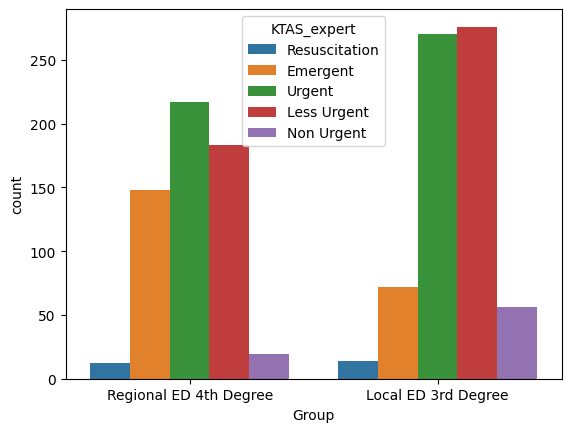

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir el orden de las categorías de KTAS_expert
ktas_order = ["Resuscitation", "Emergent", "Urgent", "Less Urgent", "Non Urgent"]

# Crear un gráfico de barras agrupadas
sns.countplot(x='Group', hue='KTAS_expert', data=df, order=df['Group'].unique(), hue_order=ktas_order)

# Mostrar el gráfico
plt.show()

<ipython-input-117-1e16929be030>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[var], order=df[var].value_counts().index, palette='viridis')
<ipython-input-117-1e16929be030>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[var], order=df[var].value_counts().index, palette='viridis')
<ipython-input-117-1e16929be030>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[var], order=df[var].value_counts().index, palette='viridis')
<ipython-input-117-1e16929be030>:7: FutureWarning: 

Passing `palette` without assigning `hue` is

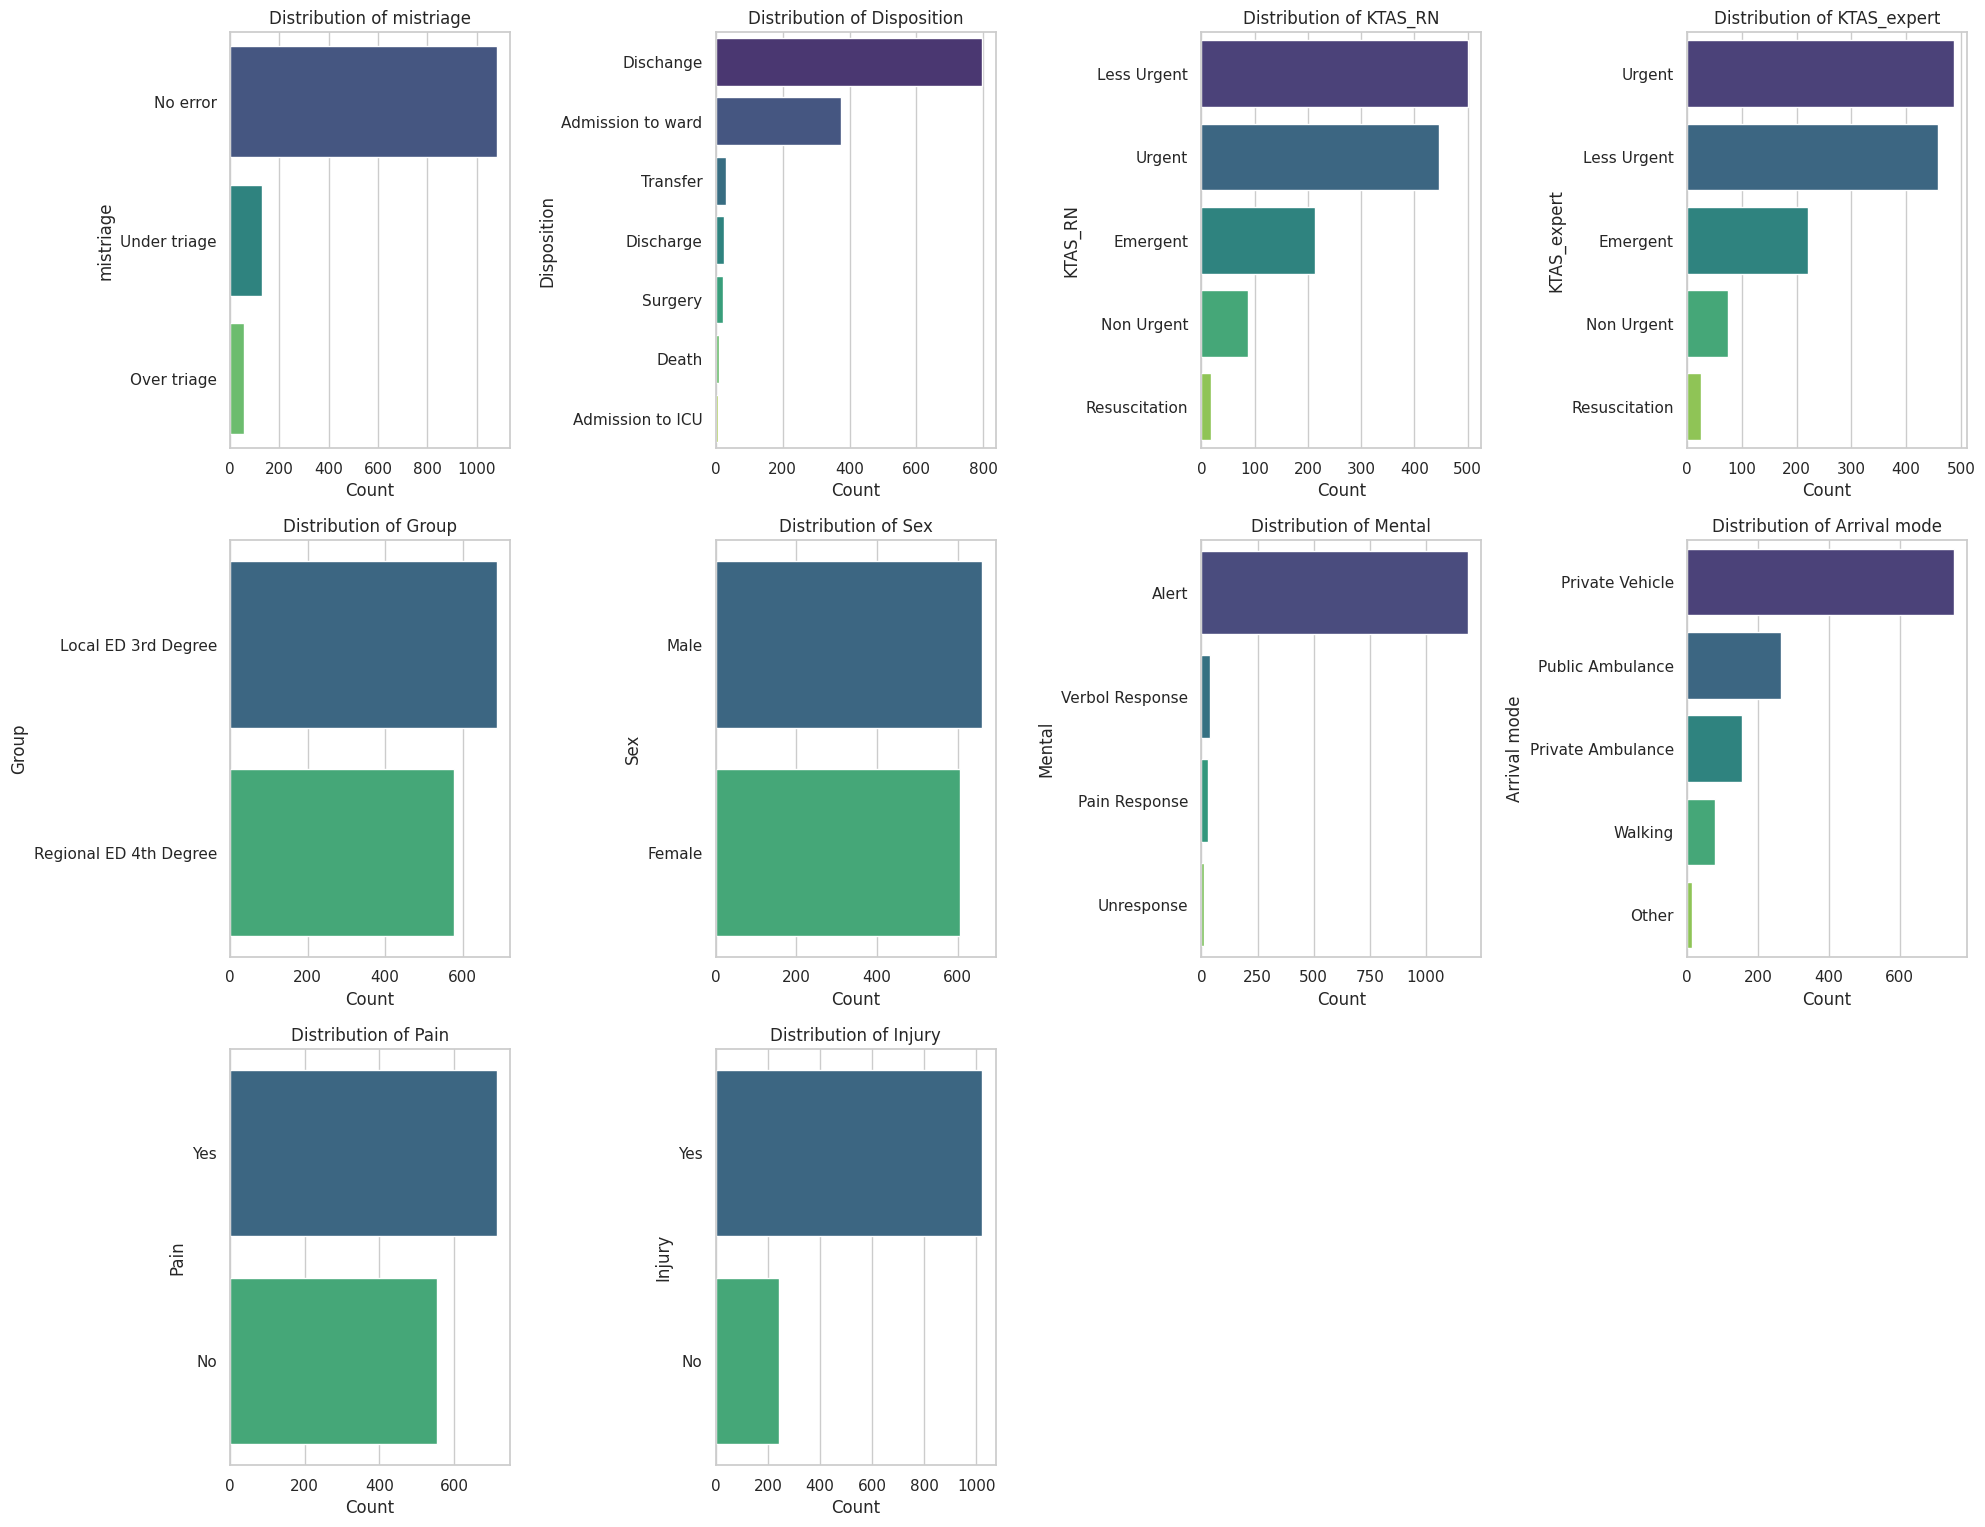

In [ ]:
sns.set(style="whitegrid")

# variables categóricas
plt.figure(figsize=(20, 20))
for i, var in enumerate(cat_variables):
    plt.subplot(4, 4, i+1)
    sns.countplot(y=df[var], order=df[var].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {var}')
    plt.xlabel('Count')
    plt.ylabel(var)
plt.tight_layout()
plt.show()

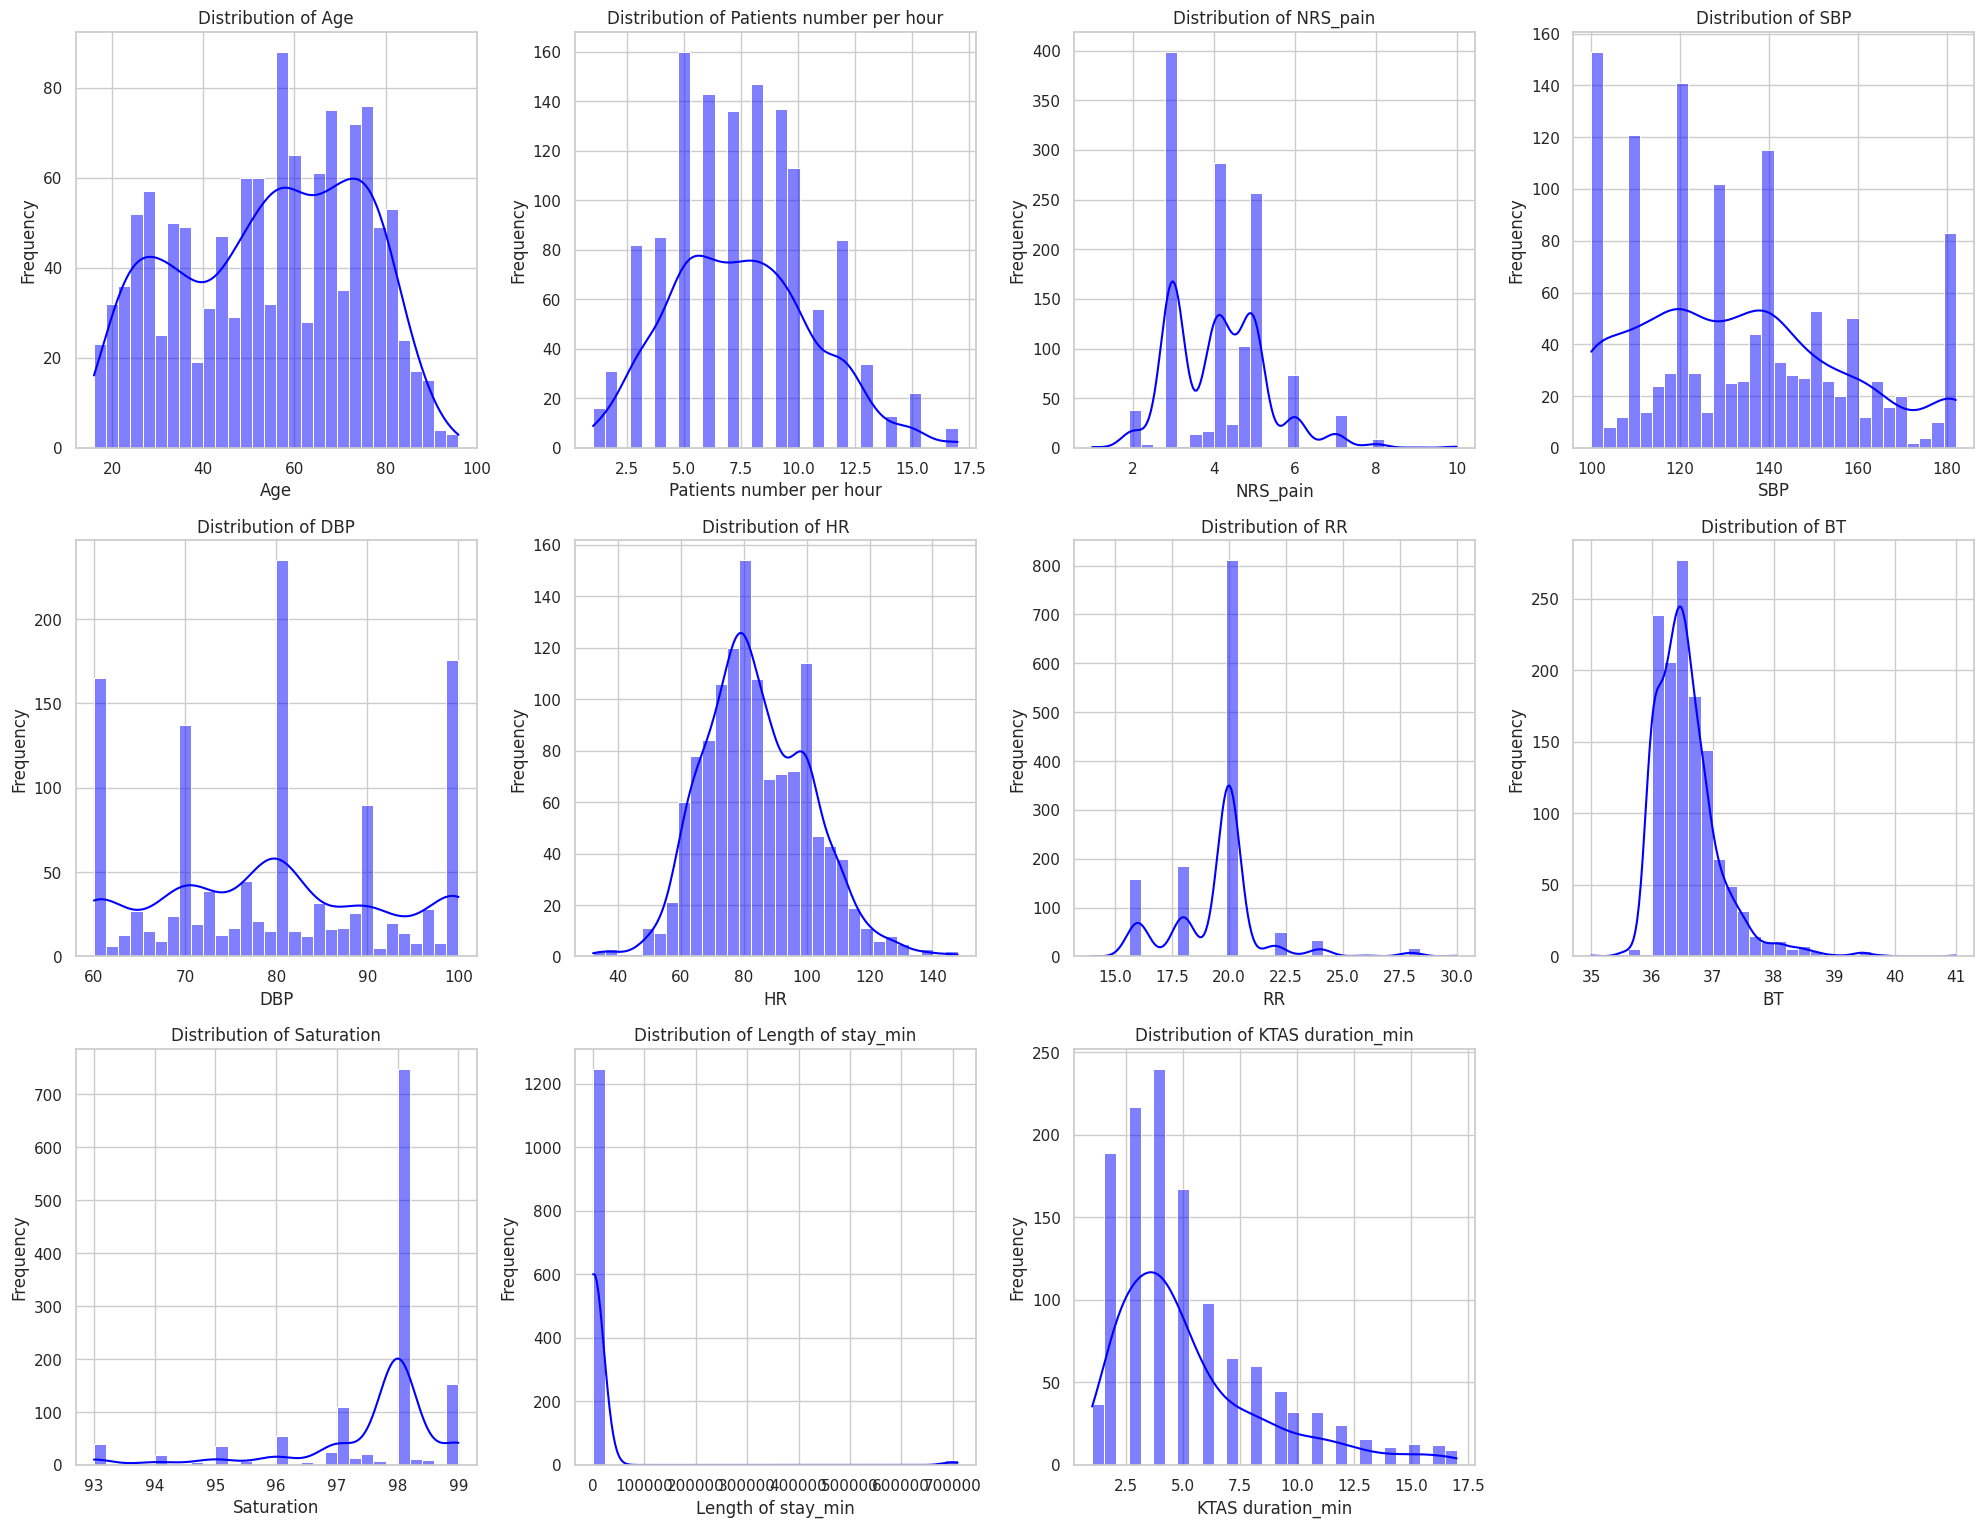

In [ ]:
# variables numéricas
plt.figure(figsize=(20, 20))
for i, var in enumerate(num_variables):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[var], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
df["Length of stay_min"].value_counts()

,count
Length of stay_min,
0,18
129,8
182,8
46,7
183,7
...,...
10304,1
293,1
19,1


In [ ]:
df[df["Length of stay_min"] == 0]

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,...,Age_Group,Nueva_Duracion_Estadia,New_SBP,New_DBP,New_HR,New_RR,New_BT,New_Saturation,Pain_encoded,New_NRS_pain
114,Local ED 3rd Degree,Female,73,4,Other,Yes,"ocular pain, Lt.",Alert,Yes,7.0,...,Adulto Mayor,Estadía Muy Corta,Normal,Normal,Taquicardia,Normal,Normal,Normal,1,Dolor
124,Local ED 3rd Degree,Female,84,12,Public Ambulance,Yes,syncope,Alert,No,5.0,...,Anciano,Estadía Muy Corta,Normal,Normal,Normal,Normal,Fiebre,Normal,0,Dolor
125,Local ED 3rd Degree,Male,79,6,Walking,Yes,general weakness,Alert,No,5.0,...,Anciano,Estadía Muy Corta,Hipertensión,Normal,Normal,Normal,Normal,Normal,0,Dolor
560,Local ED 3rd Degree,Male,72,4,Walking,Yes,"pain, chest",Alert,Yes,5.0,...,Adulto Mayor,Estadía Muy Corta,Normal,Normal,Normal,Normal,Normal,Normal,1,Dolor
565,Local ED 3rd Degree,Male,18,12,Walking,Yes,abd pain,Alert,Yes,5.0,...,Joven Adulto,Estadía Muy Corta,Normal,Normal,Taquicardia,Normal,Fiebre,Normal,1,Dolor
624,Local ED 3rd Degree,Male,54,3,Private Vehicle,Yes,Chin swelling,Alert,Yes,5.0,...,Adulto,Estadía Muy Corta,Hipertensión,Normal,Taquicardia,Normal,Normal,Normal,1,Dolor
629,Local ED 3rd Degree,Female,58,7,Public Ambulance,Yes,abdomen pain,Alert,Yes,5.0,...,Adulto Mayor,Estadía Muy Corta,Hipotensión,Hipotensión,Bradicardia,Normal,Fiebre,Normal,1,Dolor
696,Local ED 3rd Degree,Male,55,12,Walking,No,bee sting,Alert,Yes,6.0,...,Adulto Mayor,Estadía Muy Corta,Normal,Normal,Normal,Normal,Normal,Normal,1,Dolor
746,Local ED 3rd Degree,Female,58,6,Public Ambulance,Yes,"Flank pain, Rt.",Alert,Yes,7.0,...,Adulto Mayor,Estadía Muy Corta,Normal,Hipotensión,Normal,Taquipnea,Normal,Bajo Normal,1,Dolor
851,Local ED 3rd Degree,Male,24,2,Public Ambulance,Yes,post seizure,Verbol Response,No,5.0,...,Joven Adulto,Estadía Muy Corta,Hipertensión,Normal,Normal,Normal,Fiebre,Normal,0,Dolor


VER QUE HACER CON ESTO

In [ ]:
def validate_columns(df):
    validation_results = []
    for col in df.columns:
        num_unique_values = df[col].nunique()
        sample_unique_values = df[col].dropna().sample(min(num_unique_values, 5)).tolist()

        validation_results.append({
            'Variable': col,
            'Valores únicos': df[col].unique(),
            'Cant. de valores únic.': num_unique_values,
            'Muestreo de valores únic.': sample_unique_values,
        })
    validation_df = pd.DataFrame(validation_results)
    return validation_df
validate_columns(df)

,Variable,Valores únicos,Cant. de valores únic.,Muestreo de valores únic.
0,Group,"[Regional ED 4th Degree, Local ED 3rd Degree]",2,"[Local ED 3rd Degree, Regional ED 4th Degree]"
1,Sex,"[Male, Female]",2,"[Female, Female]"
2,Age,"[71, 56, 68, 58, 54, 49, 78, 32, 38, 43, 45, 5...",81,"[48, 56, 68, 74, 34]"
3,Patients number per hour,"[3, 12, 8, 4, 6, 11, 14, 10, 9, 2, 5, 7, 1, 17...",16,"[5, 8, 3, 5, 9]"
4,Arrival mode,"[Private Vehicle, Public Ambulance, Walking, P...",5,"[Private Ambulance, Private Vehicle, Private V..."
5,Injury,"[No, Yes]",2,"[Yes, No]"
6,Chief_complain,"[right ocular pain, right forearm burn, arm pa...",417,"[facial injury, altered mentality, AVF malfunc..."
7,Mental,"[Alert, Verbol Response, Pain Response, Unresp...",4,"[Alert, Unresponse, Alert, Alert]"
8,Pain,"[Yes, No]",2,"[Yes, Yes]"
9,NRS_pain,"[2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 9.0, 4.2, 3.8, ...",21,"[4.2, 2.8, 5.0, 4.0, 2.0]"


Rangos normales aproximados para las variables de signos vitales y edad en el contexto de un análisis clínico:

- Edad (Age): 18 - 80 años
- Presión Arterial Sistólica (SBP):
  - normal: 90 - 120 mmHg.
  - Hipertensión: valores por encima de 130 mmHg.
  - Hipotensión: valores por debajo de 90 mmHg.
- Presión Arterial Diastólica (DBP):
  - normal: 60 - 80 mmHg.
  - Hipertensión: valores por encima de 90 mmHg.
  - Hipotensión: valores por debajo de 60 mmHg.
- Frecuencia Cardíaca (HR):
  - normal en adultos: 60 - 100 latidos por minuto.
  - Taquicardia: valores por encima de 100 latidos por minuto.
  - Bradicardia: valores por debajo de 60 latidos por minuto.
- Frecuencia Respiratoria (RR):
  - normal: 12 - 20 respiraciones por minuto.
  - Taquipnea: valores por encima de 20 respiraciones por minuto.
  - Bradipnea: valores por debajo de 12 respiraciones por minuto.
- Temperatura Corporal (BT):
  - normal: 36.1 - 37.2 °C (98.2 - 99 °F).
  - Fiebre: valores por encima de 38 °C (100.4 °F).
  - Hipotermia: valores por debajo de 35 °C (95 °F).
- Saturación de Oxígeno (Saturation):
  - normal: 95 - 100%.
  - Hipoxemia: valores por debajo de 90%.

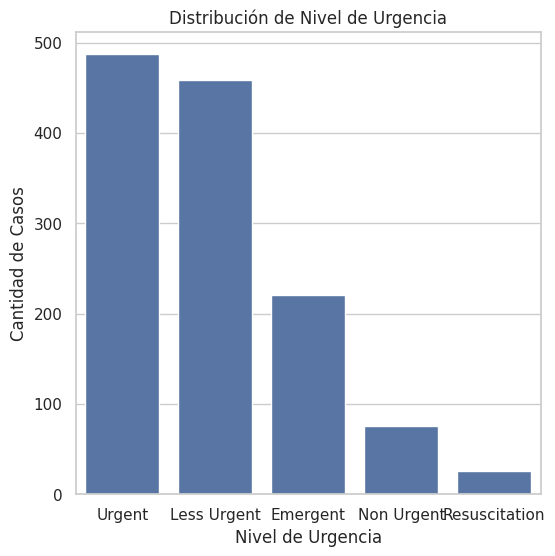

In [ ]:
import seaborn as sns

plt.figure(figsize=(6, 6))
order = df['KTAS_expert'].value_counts(ascending=False).index
sns.countplot(x='KTAS_expert', data=df, order=order)
plt.title("Distribución de Nivel de Urgencia")
plt.xlabel("Nivel de Urgencia")
plt.ylabel("Cantidad de Casos")
plt.show()

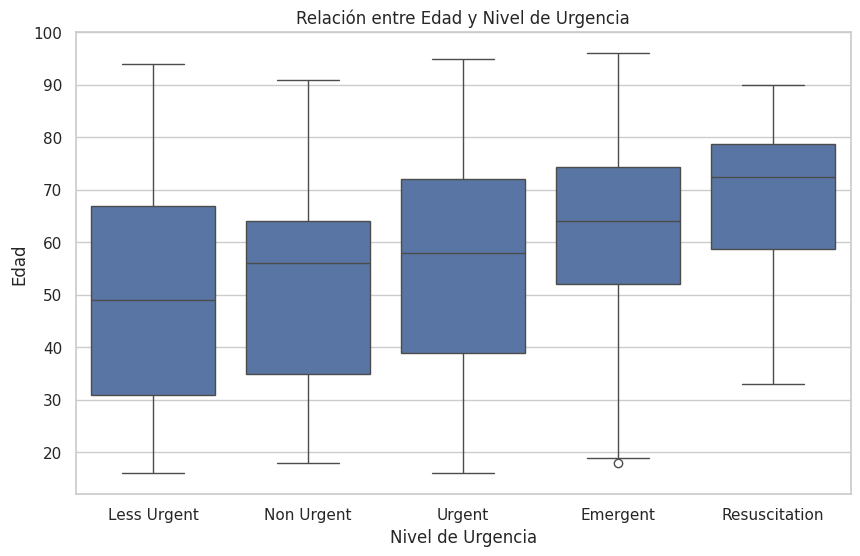

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='KTAS_expert', y='Age', data=df)
plt.title("Relación entre Edad y Nivel de Urgencia")
plt.xlabel("Nivel de Urgencia")
plt.ylabel("Edad")
plt.show()


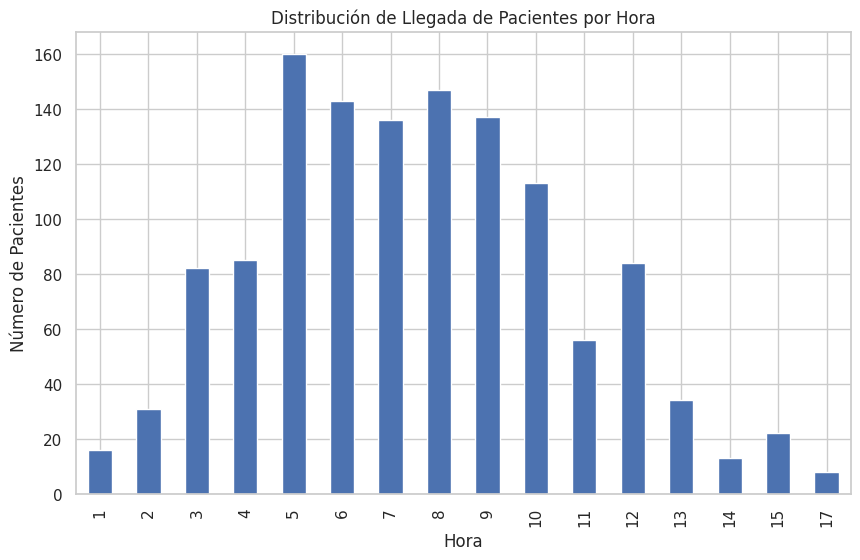

In [ ]:
plt.figure(figsize=(10, 6))
df['Patients number per hour'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribución de Llegada de Pacientes por Hora")
plt.xlabel("Hora")
plt.ylabel("Número de Pacientes")
plt.show()


CHEQUEAR BIEN ESTO PORQUE NO SE SI ES CANTIDAD DE PACIENTES POR HORA (LITERAL HORA, EJ 9 AM) O SI ES CANT DE PACIENTES EN LA MISMA HORA EN LA QUE LLEGÓ EL PACIENTE QUE MEDIMOS

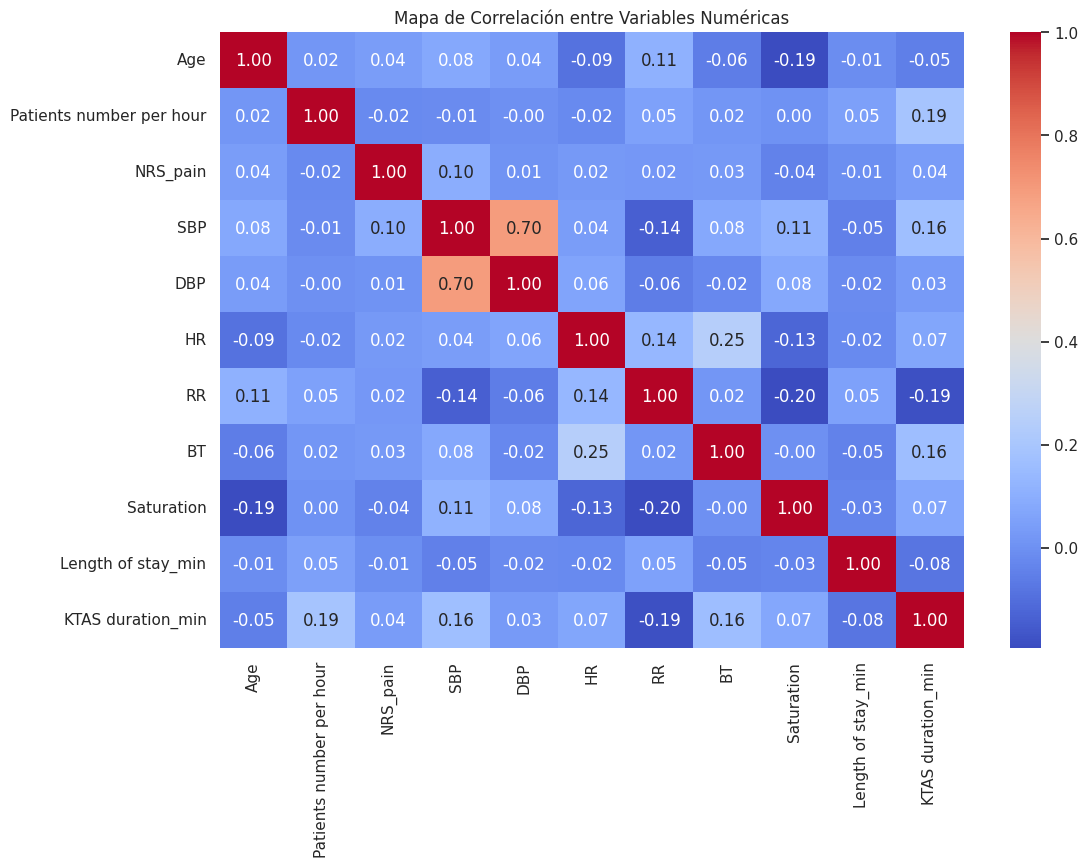

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_variables].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Correlación entre Variables Numéricas")
plt.show()


Relación entre Presión Arterial Sistólica (SBP) y Presión Arterial Diastólica (DBP): positiva alta (0.77) entre es esperado, ya que ambas son mediciones de la presión arterial y suelen estar relacionadas: cuando la presión sistólica es alta, la diastólica también tiende a serlo.

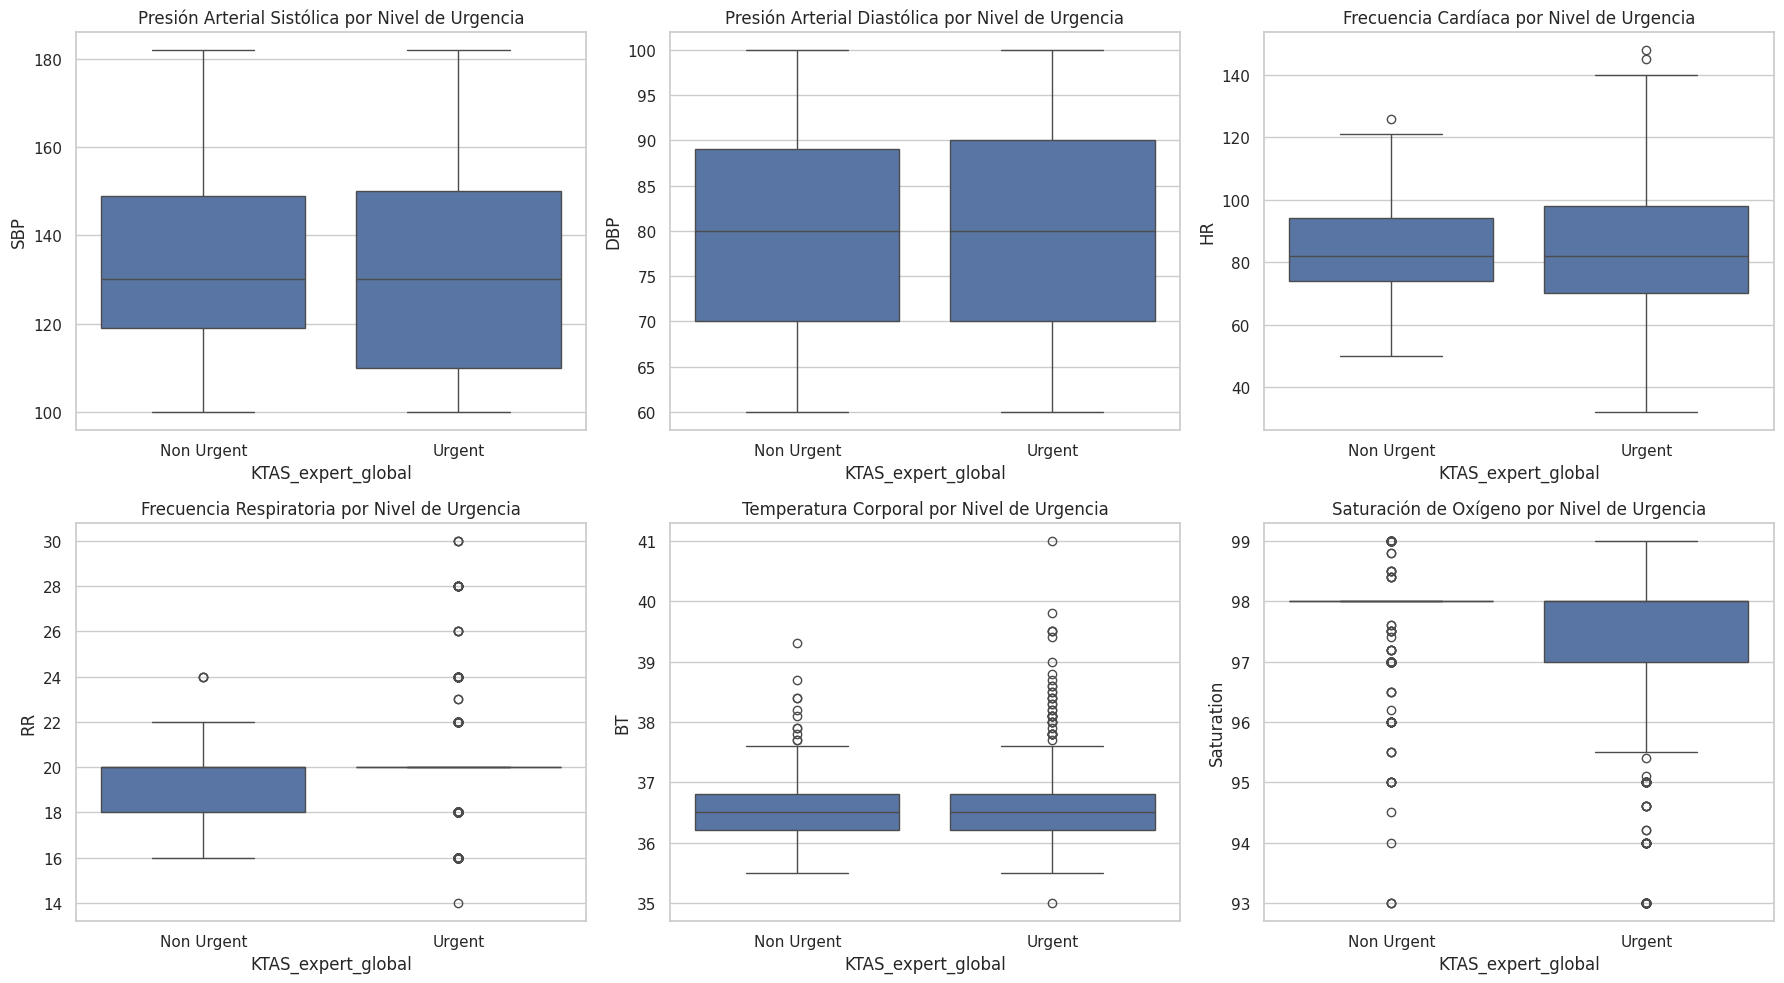

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.boxplot(x='KTAS_expert_global', y='SBP', data=df, ax=axes[0, 0])
axes[0, 0].set_title("Presión Arterial Sistólica por Nivel de Urgencia")

sns.boxplot(x='KTAS_expert_global', y='DBP', data=df, ax=axes[0, 1])
axes[0, 1].set_title("Presión Arterial Diastólica por Nivel de Urgencia")

sns.boxplot(x='KTAS_expert_global', y='HR', data=df, ax=axes[0, 2])
axes[0, 2].set_title("Frecuencia Cardíaca por Nivel de Urgencia")

sns.boxplot(x='KTAS_expert_global', y='RR', data=df, ax=axes[1, 0])
axes[1, 0].set_title("Frecuencia Respiratoria por Nivel de Urgencia")

sns.boxplot(x='KTAS_expert_global', y='BT', data=df, ax=axes[1, 1])
axes[1, 1].set_title("Temperatura Corporal por Nivel de Urgencia")

sns.boxplot(x='KTAS_expert_global', y='Saturation', data=df, ax=axes[1, 2])
axes[1, 2].set_title("Saturación de Oxígeno por Nivel de Urgencia")

plt.tight_layout()
plt.show()


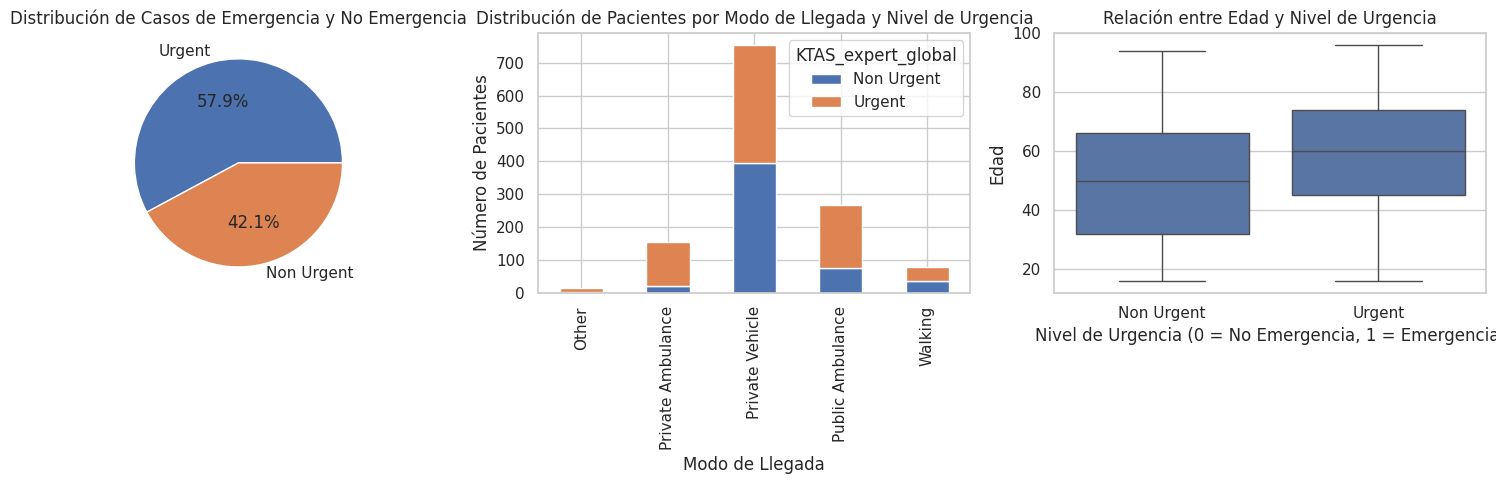

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con 3 gráficos
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico 1: Porcentaje de casos de emergencia vs no emergencia (KTAS_expert_global)
emergency_counts = df['KTAS_expert_global'].value_counts()
ax[0].pie(emergency_counts, labels=emergency_counts.index, autopct='%.1f%%')
ax[0].set_title('Distribución de Casos de Emergencia y No Emergencia')

# Gráfico 2: Distribución de pacientes por modo de llegada (Arrival mode) y nivel de urgencia (KTAS_expert_global)
arrival_mode_counts = df.groupby(['Arrival mode', 'KTAS_expert_global']).size().unstack()
arrival_mode_counts.plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Distribución de Pacientes por Modo de Llegada y Nivel de Urgencia')
ax[1].set_ylabel('Número de Pacientes')
ax[1].set_xlabel('Modo de Llegada')

# Gráfico 3: Relación entre dolor (NRS_pain) y edad por nivel de urgencia
sns.boxplot(x='KTAS_expert_global', y='Age', data=df, ax=ax[2])
ax[2].set_title('Relación entre Edad y Nivel de Urgencia')
ax[2].set_ylabel('Edad')
ax[2].set_xlabel('Nivel de Urgencia (0 = No Emergencia, 1 = Emergencia)')

plt.tight_layout()
plt.show()


## **NLP - Zero Shot Classification**

In [ ]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
import string

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Cargar módulos y datos
lemmatizer = WordNetLemmatizer() #mejor que stemming (más agresivo)
stopwords_en = set(nltk.corpus.stopwords.words('english'))
stopwords_en.add('no')
punctuation = string.punctuation

def normalize(text):
    # Tokenizamos
    text_tokens = nltk.wordpunct_tokenize(text) #separa simbolos de puntuacion como token

    # Pasamos a minúsculas y alfanumérico
    text_lower_alpha = [token.lower() for token in text_tokens if token.isalnum()]

    # Eliminamos tokens que contengan números
    text_no_numbers = [token for token in text_lower_alpha if not any(char.isdigit() for char in token)]

    # Eliminamos stop-words
    text_clean = [token for token in text_no_numbers if token not in stopwords_en]

    filtered_words = [token for token in text_clean if len(token) > 2]

    # Lematizamos
    normalized_text = [lemmatizer.lemmatize(word) for word in filtered_words]

    return normalized_text

In [ ]:
df['Chief_complain_cleaned'] = df['Chief_complain'].apply(normalize)
df['Diagnosis_in_ED_cleaned'] = df['Diagnosis in ED'].apply(normalize)

In [ ]:
def join_tokens(tokens):
    return " ".join(tokens)

df['Chief_complain_cleaned'] = df['Chief_complain_cleaned'].apply(join_tokens)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['Chief_complain_cleaned'])

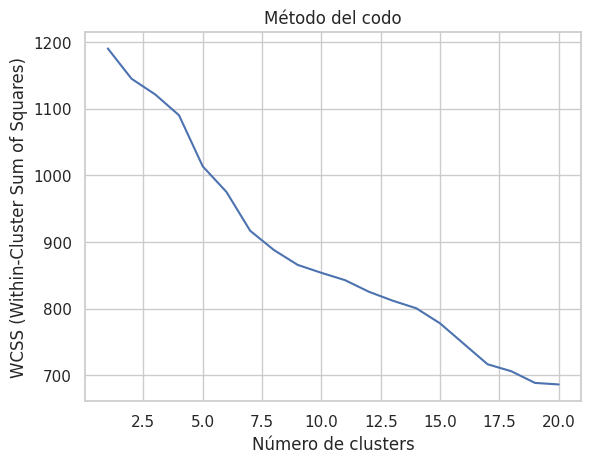

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 21):  # Prueba con diferentes números de clusters (de 1 a 10)
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)  # Inertia_ representa la suma de cuadrados dentro del cluster

# Graficar los resultados
plt.plot(range(1, 21), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

Zero Shot Classification is the task of predicting a class that wasn't seen by the model during training. This method, which leverages a pre-trained language model, can be thought of as an instance of transfer learning which generally refers to using a model trained for one task in a different application than what it was originally trained for. This is particularly useful for situations where the amount of labeled data is small.

In zero shot classification, we provide the model with a prompt and a sequence of text that describes what we want our model to do, in natural language. Zero-shot classification excludes any examples of the desired task being completed. This differs from single or few-shot classification, as these tasks include a single or a few examples of the selected task.

In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline

Cambiar esto según los problemas que queramos. Chequear un poco la columna para ver como podemos agrupar los problemas y tmb guiarnos con la guia de KTAS de Korea

In [ ]:

categories = [
    "Cardiovascular",
    "Respiratory",
    "Neurological",
    "Traumatic",
    "Gastrointestinal",
    "Infectious",
    "Psychiatric",
    "Endocrinological and Metabolic",
    "Dermatological",
    "Toxicological"
]


In [ ]:

classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Función para clasificar un síntoma
def classify_symptom(text):
    result = classifier(text, candidate_labels=categories)
    return result["labels"][0]  # Devuelve la categoría con mayor puntaje
'''
# Aplicar la clasificación a cada síntoma
df['Symptom_Category'] = df['Chief_complain'].apply(classify_symptom)
'''

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

"\n# Aplicar la clasificación a cada síntoma\ndf['Symptom_Category'] = df['Chief_complain'].apply(classify_symptom)\n"

In [ ]:
'''
#CÓDIGO PARA GENERAR LA TABLA MAESTRA CON LOS SÍNTOMAS:


# Asumiendo que 'df' es el DataFrame con las columnas 'Chief_complain' y 'Symptom_Category'

# Crear el DataFrame maestro con combinaciones únicas
master_df = df[['Chief_complain', 'Symptom_Category']].drop_duplicates()

# Guardar el DataFrame maestro en un archivo CSV localmente
master_file_name = 'MAESTRO_SINTOMAS.csv'
master_df.to_csv(master_file_name, index=False)

# Subir el archivo maestro a Google Cloud Storage
from google.cloud import storage

# Configura tu cliente de GCS
client = storage.Client()
bucket_name = 'df_triage'
bucket = client.get_bucket(bucket_name)
blob = bucket.blob(master_file_name)

# Sube el archivo CSV al bucket
blob.upload_from_filename(master_file_name)

print(f"Master table has been created and uploaded to gs://{bucket_name}/{master_file_name}")
'''

'\n#CÓDIGO PARA GENERAR LA TABLA MAESTRA CON LOS SÍNTOMAS:\n\n\n# Asumiendo que \'df\' es el DataFrame con las columnas \'Chief_complain\' y \'Symptom_Category\'\n\n# Crear el DataFrame maestro con combinaciones únicas\nmaster_df = df[[\'Chief_complain\', \'Symptom_Category\']].drop_duplicates()\n\n# Guardar el DataFrame maestro en un archivo CSV localmente\nmaster_file_name = \'MAESTRO_SINTOMAS.csv\'\nmaster_df.to_csv(master_file_name, index=False)\n\n# Subir el archivo maestro a Google Cloud Storage\nfrom google.cloud import storage\n\n# Configura tu cliente de GCS\nclient = storage.Client()\nbucket_name = \'df_triage\'\nbucket = client.get_bucket(bucket_name)\nblob = bucket.blob(master_file_name)\n\n# Sube el archivo CSV al bucket\nblob.upload_from_filename(master_file_name)\n\nprint(f"Master table has been created and uploaded to gs://{bucket_name}/{master_file_name}")\n'

In [ ]:
#CÓDIGO QUE LLAMA LA TABLA MAESTRA Y SE FIJA SI HAY ALGÚN SÍNTOMA NUEVO. SI HAY UNO NUEVO, CORRE EL TRANSFORMER SOLO PARA ESE SÍNTOMA. SINO, HACE EL JOIN DIRECTAMENTE DEL MAESTRO CON EL DF.

client = storage.Client()
bucket_name = 'df_triage'
file_name = 'MAESTRO_SINTOMAS.csv'
bucket = client.get_bucket(bucket_name)
blob = bucket.blob(file_name)

# Intentar cargar la tabla maestra
try:
    blob.download_to_filename(file_name)
    MAESTRO_SINTOMAS = pd.read_csv(file_name)
except:
    # Si no existe, crea un DataFrame vacío
    MAESTRO_SINTOMAS = pd.DataFrame(columns=['Chief_complain', 'Symptom_Category'])

# Identificar nuevos Chief_complain que no están en la tabla maestra
new_complains = df[~df['Chief_complain'].isin(MAESTRO_SINTOMAS['Chief_complain'])]

if not new_complains.empty:
    # Clasificar solo los nuevos
    new_complains['Symptom_Category'] = new_complains['Chief_complain'].apply(classify_symptom)

    # Añadir los nuevos registros a la tabla maestra
    MAESTRO_SINTOMAS = pd.concat([MAESTRO_SINTOMAS, new_complains[['Chief_complain', 'Symptom_Category']]], ignore_index=True)

# Guardar la tabla maestra actualizada de vuelta en GCS
MAESTRO_SINTOMAS.to_csv(file_name, index=False)
blob.upload_from_filename(file_name)

# Mapear las categorías a los Chief_complain en el DataFrame original
df = df.merge(MAESTRO_SINTOMAS, on='Chief_complain', how='left')

In [ ]:
df.columns

Index(['Group', 'Sex', 'Age', 'Patients number per hour', 'Arrival mode',
       'Injury', 'Chief_complain', 'Mental', 'Pain', 'NRS_pain', 'SBP', 'DBP',
       'HR', 'RR', 'BT', 'Saturation', 'KTAS_RN', 'Diagnosis in ED',
       'Disposition', 'KTAS_expert', 'Error_group', 'Length of stay_min',
       'KTAS duration_min', 'mistriage', 'KTAS_nurse_global',
       'KTAS_expert_global', 'Coincidence_expert_nurse', 'Nivel_Triaje_KTAS',
       'Age_Group', 'Nueva_Duracion_Estadia', 'New_SBP', 'New_DBP', 'New_HR',
       'New_RR', 'New_BT', 'New_Saturation', 'Pain_encoded', 'New_NRS_pain',
       'Chief_complain_cleaned', 'Diagnosis_in_ED_cleaned',
       'Symptom_Category'],
      dtype='object')

In [ ]:
df["Symptom_Category"].value_counts()

,count
Symptom_Category,
Respiratory,349
Traumatic,290
Gastrointestinal,163
Infectious,153
Psychiatric,124
Dermatological,80
Neurological,60
Endocrinological and Metabolic,19
Cardiovascular,18


In [ ]:
for label in categories:
    sample_data = df[df['Symptom_Category'] == label].sample(n=10)
    print(f"Symptom Category: {label}")
    print(sample_data['Chief_complain'].tolist())  # Print the 'Chief_complain' values
    print("\n")

Symptom Category: Cardiovascular
['hypertension', 'pain, periumbilical', 'chest discomfort left', 'chest palpitation', 'CT film copy', 'chest palpitation', 'pain, periumbilical', 'chest palpitation', 'Blood Pressure, Low', 'chest wall pain right']


Symptom Category: Respiratory
['dizziness', 'Lt hemiparesis', 'dizziness', 'Voice changes', 'dyspnea', 'dyspnea', 'ant. chest pain', 'pain, chest', 'vomiting', 'ant. chest pain']


Symptom Category: Neurological
['left side motor weakness', 'mandibular pain', 'right motor weakness', 'HA - Headache', 'LOC - Loss of consciousness', 'post seizure', 'HA - Headache', 'Numbness, Arm', 'DZ - Dizziness', 'Seizure Like Activity']


Symptom Category: Traumatic
['abd pain', 'shoulder pain, Lt', 'shoulder pain, both', 'Open Wound', 'Convulsion', 'facial palsy left', 'both leg  motor weakness', 'buttock pain', 'abd pain', 'RLQ pain']


Symptom Category: Gastrointestinal
['general weakness', 'abdomen pain', 'copy', 'epigastric pain', 'Retention, Bladder'

*Distribución de Casos de Emergencia y No Emergencia:*
Muestra que el 57.9% de los casos son clasificados como "No Emergencia", mientras que el 42.1% son clasificados como "Emergencia". Esto indica un balance razonable entre ambos niveles de urgencia, aunque hay más casos de no emergencia en el dataset.

*Distribución de Pacientes por Modo de Llegada y Nivel de Urgencia:*
La mayoría de los pacientes llegaron al hospital por el modo de llegada representado por "3" (vehículo privado), con una mayor proporción de casos de "No Emergencia" en comparación con otros modos. Esto sugiere que ciertos modos de llegada están más asociados a casos de menor urgencia.

*Relación entre Edad y Nivel de Urgencia:*
La mediana de edad parece estar en torno a los 50 años en ambos grupos, lo que indica que la edad puede no ser un factor determinante para la clasificación de urgencia en este dataset.

##Feature Selection

In [ ]:
df.columns

Index(['Group', 'Sex', 'Age', 'Patients number per hour', 'Arrival mode',
       'Injury', 'Chief_complain', 'Mental', 'Pain', 'NRS_pain', 'SBP', 'DBP',
       'HR', 'RR', 'BT', 'Saturation', 'KTAS_RN', 'Diagnosis in ED',
       'Disposition', 'KTAS_expert', 'Error_group', 'Length of stay_min',
       'KTAS duration_min', 'mistriage', 'KTAS_nurse_global',
       'KTAS_expert_global', 'Coincidence_expert_nurse', 'Nivel_Triaje_KTAS',
       'Age_Group', 'Nueva_Duracion_Estadia', 'New_SBP', 'New_DBP', 'New_HR',
       'New_RR', 'New_BT', 'New_Saturation', 'Pain_encoded', 'New_NRS_pain',
       'Chief_complain_cleaned', 'Diagnosis_in_ED_cleaned',
       'Symptom_Category'],
      dtype='object')

In [ ]:
cat_variables

['mistriage',
 'Disposition',
 'KTAS_RN',
 'KTAS_expert',
 'Group',
 'Sex',
 'Mental',
 'Arrival mode',
 'Pain',
 'Injury']

In [ ]:
cat_variables.extend(['KTAS_nurse_global',
       'KTAS_expert_global', 'Coincidence_expert_nurse', 'Nivel_Triaje_KTAS',
       'Age_Group', 'Nueva_Duracion_Estadia', 'New_SBP',
       'New_DBP', 'New_HR', 'New_RR', 'New_BT', "Symptom_Category"])

Sacamos todas aquellas que son consecuencia del KTAS y las as is columns. Patients number per hour tmb la sacamos porque no es algo que determina la urgencia de atencion de un paciente. Si sirve para la gestion de atencion de los pacientes pero no para saber si lo que padece el paciente es urgente o no.


In [ ]:
excluded_columns = ["Group", "Patients number per hour","Chief_complain", "Diagnosis in ED", "Error_group", "KTAS_expert", "KTAS_RN", "mistriage", "Disposition", "Length of stay_min", "KTAS duration_min", 'KTAS_nurse_global',
       'KTAS_expert_global', 'Coincidence_expert_nurse', 'Nivel_Triaje_KTAS', 'Nueva_Duracion_Estadia', 'Chief_complain_cleaned', 'Diagnosis_in_ED_cleaned']

# Crear un DataFrame sin las columnas excluidas
df_cleaned = df.drop(columns=excluded_columns)

In [ ]:
df_cleaned.columns

Index(['Sex', 'Age', 'Arrival mode', 'Injury', 'Mental', 'Pain', 'NRS_pain',
       'SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturation', 'Age_Group', 'New_SBP',
       'New_DBP', 'New_HR', 'New_RR', 'New_BT', 'New_Saturation',
       'Pain_encoded', 'New_NRS_pain', 'Symptom_Category'],
      dtype='object')

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def apply_ohe_and_scaler(df, cat_variables, num_variables, excluded_columns=None):
    """
    Applies One-Hot Encoding to categorical columns and StandardScaler to numerical columns.
    Ignores specified excluded columns.
    """
    if excluded_columns is None:
        excluded_columns = []

    # Remove excluded columns from num_variables and cat_variables
    # to avoid accessing them after they've been dropped from the DataFrame
    num_variables = [col for col in num_variables if col not in excluded_columns]
    cat_variables = [col for col in cat_variables if col not in excluded_columns]

    # Excluir columnas no deseadas del DataFrame
    df = df.drop(columns=excluded_columns, errors='ignore')

    # Convertir columnas categóricas a tipo string (necesario para OHE)
    for col in cat_variables:
        df[col] = df[col].astype(str)

    # Preprocesador para OHE y escalado
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_variables),
            ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_variables)
        ])

    # Transformar el DataFrame
    df_transformed = preprocessor.fit_transform(df)

    # Recuperar nombres de las columnas para el DataFrame final
    ohe_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_variables)
    final_columns = num_variables + list(ohe_columns)

    # Crear un DataFrame final con las columnas transformadas
    df_final = pd.DataFrame(df_transformed, columns=final_columns, index=df.index)

    return df_final

In [ ]:
df_transformed = apply_ohe_and_scaler(df, cat_variables, num_variables, excluded_columns=excluded_columns)
df_transformed

,Age,NRS_pain,SBP,DBP,HR,RR,BT,Saturation,Sex_Female,Sex_Male,...,Symptom_Category_Cardiovascular,Symptom_Category_Dermatological,Symptom_Category_Endocrinological and Metabolic,Symptom_Category_Gastrointestinal,Symptom_Category_Infectious,Symptom_Category_Neurological,Symptom_Category_Psychiatric,Symptom_Category_Respiratory,Symptom_Category_Toxicological,Symptom_Category_Traumatic
0,0.840694,-1.799681,1.144599,1.601929,-0.006801,-0.749701,0.049621,1.121603,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.079938,-1.799681,0.159724,-0.358246,-1.452927,0.223528,-0.133673,0.334437,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.688543,-1.799681,-0.140020,0.033789,1.077794,0.223528,0.049621,0.334437,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.840694,-0.951394,0.245365,1.131487,0.234220,0.223528,-0.133673,0.334437,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.181372,-0.951394,-1.424640,-0.985502,0.535497,-0.749701,-0.133673,0.334437,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1.246430,0.405866,-0.568227,0.033789,0.113710,1.196756,-0.316967,-2.027062,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1263,1.347864,-0.951394,-0.568227,0.033789,0.595752,0.223528,-0.316967,-0.452729,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1264,1.347864,0.066551,-0.140020,0.817859,-0.247822,0.223528,-0.683554,1.121603,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1265,1.347864,-0.103107,1.572805,1.601929,-0.368332,0.223528,0.049621,0.334437,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_transformed.columns

Index(['Age', 'NRS_pain', 'SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturation',
       'Sex_Female', 'Sex_Male', 'Mental_Alert', 'Mental_Pain Response',
       'Mental_Unresponse', 'Mental_Verbol Response', 'Arrival mode_Other',
       'Arrival mode_Private Ambulance', 'Arrival mode_Private Vehicle',
       'Arrival mode_Public Ambulance', 'Arrival mode_Walking', 'Pain_No',
       'Pain_Yes', 'Injury_No', 'Injury_Yes', 'Age_Group_Adolescente',
       'Age_Group_Adulto', 'Age_Group_Adulto Mayor', 'Age_Group_Anciano',
       'Age_Group_Joven Adulto', 'New_SBP_Hipertensión', 'New_SBP_Hipotensión',
       'New_SBP_Normal', 'New_DBP_Hipertensión', 'New_DBP_Hipotensión',
       'New_DBP_Normal', 'New_HR_Bradicardia', 'New_HR_Normal',
       'New_HR_Taquicardia', 'New_RR_Normal', 'New_RR_Taquipnea',
       'New_BT_Fiebre', 'New_BT_Hipotermia', 'New_BT_Normal',
       'Symptom_Category_Cardiovascular', 'Symptom_Category_Dermatological',
       'Symptom_Category_Endocrinological and Metabolic',
       

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['KTAS_expert_encoded'] = encoder.fit_transform(df['KTAS_expert_global'])
df_transformed = pd.merge(df_transformed, df[['KTAS_expert_encoded']], left_index=True, right_index=True, how='left')

In [ ]:
df_transformed.head(5)

,Age,NRS_pain,SBP,DBP,HR,RR,BT,Saturation,Sex_Female,Sex_Male,...,Symptom_Category_Dermatological,Symptom_Category_Endocrinological and Metabolic,Symptom_Category_Gastrointestinal,Symptom_Category_Infectious,Symptom_Category_Neurological,Symptom_Category_Psychiatric,Symptom_Category_Respiratory,Symptom_Category_Toxicological,Symptom_Category_Traumatic,KTAS_expert_encoded
0,0.840694,-1.799681,1.144599,1.601929,-0.006801,-0.749701,0.049621,1.121603,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0.079938,-1.799681,0.159724,-0.358246,-1.452927,0.223528,-0.133673,0.334437,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.688543,-1.799681,-0.140020,0.033789,1.077794,0.223528,0.049621,0.334437,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0.840694,-0.951394,0.245365,1.131487,0.234220,0.223528,-0.133673,0.334437,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0.181372,-0.951394,-1.424640,-0.985502,0.535497,-0.749701,-0.133673,0.334437,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [ ]:
df_transformed.columns

Index(['Age', 'NRS_pain', 'SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturation',
       'Sex_Female', 'Sex_Male', 'Mental_Alert', 'Mental_Pain Response',
       'Mental_Unresponse', 'Mental_Verbol Response', 'Arrival mode_Other',
       'Arrival mode_Private Ambulance', 'Arrival mode_Private Vehicle',
       'Arrival mode_Public Ambulance', 'Arrival mode_Walking', 'Pain_No',
       'Pain_Yes', 'Injury_No', 'Injury_Yes', 'Age_Group_Adolescente',
       'Age_Group_Adulto', 'Age_Group_Adulto Mayor', 'Age_Group_Anciano',
       'Age_Group_Joven Adulto', 'New_SBP_Hipertensión', 'New_SBP_Hipotensión',
       'New_SBP_Normal', 'New_DBP_Hipertensión', 'New_DBP_Hipotensión',
       'New_DBP_Normal', 'New_HR_Bradicardia', 'New_HR_Normal',
       'New_HR_Taquicardia', 'New_RR_Normal', 'New_RR_Taquipnea',
       'New_BT_Fiebre', 'New_BT_Hipotermia', 'New_BT_Normal',
       'Symptom_Category_Cardiovascular', 'Symptom_Category_Dermatological',
       'Symptom_Category_Endocrinological and Metabolic',
       

In [ ]:
df['KTAS_expert_encoded'].value_counts()

,count
KTAS_expert_encoded,
1,733
0,534


In [ ]:
X = df_transformed.drop(columns=['KTAS_expert_encoded'])
y = df_transformed['KTAS_expert_encoded']

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier()

rfe = RFE(estimator = estimator, n_features_to_select = 10, step = 1)

rfe.fit(X, y)

selected_features = X.columns[rfe.support_]

print("Características seleccionadas:")

print(selected_features)

print(rfe.ranking_)

Características seleccionadas:
Index(['Age', 'NRS_pain', 'SBP', 'DBP', 'HR', 'BT', 'Saturation', 'Injury_No',
       'Injury_Yes', 'Symptom_Category_Respiratory'],
      dtype='object')
[ 1  1  1  1  1  4  1  1  9 14 26 39 41 38 40  8  3 15 30  6  2  1  1 42
 20 16 21 11 23 29 13 34 25 18 36 19 32 33 27 28 31 17 37  5 43 10 22 24
 12  1 35  7]


In [ ]:
from sklearn.feature_selection import chi2
import numpy as np

X_non_negative = X.copy()

# Apply a transformation to ensure non-negativity (e.g., absolute value)
X_non_negative[X_non_negative < 0] = 0  # Replace negative values with 0

# Calculate chi2 scores and p-values using the non-negative data
chi2_scores, p_values = chi2(X_non_negative, y)

# Select features with the highest chi-squared scores
selected_features = X.columns[np.argsort(chi2_scores)[-10:]]  # Select top 10 features

print("Características seleccionadas:")
print(selected_features)

Características seleccionadas:
Index(['Arrival mode_Private Vehicle', 'New_RR_Taquipnea', 'Pain_No',
       'Symptom_Category_Traumatic', 'Arrival mode_Private Ambulance',
       'Symptom_Category_Dermatological', 'RR', 'NRS_pain',
       'Symptom_Category_Respiratory', 'Injury_No'],
      dtype='object')


In [ ]:
from sklearn.feature_selection import mutual_info_classif  # For classification

# Assuming X is your feature matrix and y is your target variable
mutual_info_scores = mutual_info_classif(X, y)

# Select features with the highest mutual information scores
selected_features = X.columns[np.argsort(mutual_info_scores)[-10:]]  # Select top 10

print("Características seleccionadas:")
print(selected_features)

Características seleccionadas:
Index(['Age', 'Mental_Alert', 'Arrival mode_Private Ambulance',
       'Symptom_Category_Respiratory', 'Symptom_Category_Dermatological',
       'Pain_Yes', 'Injury_No', 'Pain_No', 'Arrival mode_Private Vehicle',
       'NRS_pain'],
      dtype='object')


##FASE 5: Modelo

##Modelo final ambulancias (triage 1-5)

In [ ]:
df["KTAS_expert"].value_counts()

,count
KTAS_expert,
Urgent,487
Less Urgent,459
Emergent,220
Non Urgent,75
Resuscitation,26


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

categorical_columns = ['Sex', 'Arrival mode', 'Injury', 'Mental', 'Pain','Age_Group', 'New_SBP', 'New_DBP', 'New_HR', 'New_RR', 'New_BT', 'New_Saturation','New_NRS_pain', 'Symptom_Category']
numeric_columns =['Age', 'NRS_pain', 'SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturation']

category_mapping = {
    'Resuscitation': 0, #ponemos que empieze en 0 porque XGBoost necesita que los labels comiencen en 0
    'Emergent': 1,
    'Urgent': 2,
    'Less Urgent': 3,
    'Non Urgent': 4
}

# Aplicar la asignación a la columna
df['KTAS_encoded'] = df['KTAS_expert'].map(category_mapping)

X = df[categorical_columns + numeric_columns]
y = df['KTAS_encoded']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Pipeline de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

# Lista de modelos y sus hiperparámetros
models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__max_depth': [10, 20],
            'model__min_samples_split': [2, 5]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'model__n_neighbors': [3, 5, 7],
            'model__weights': ['uniform', 'distance']
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.01, 0.1],
            'model__max_depth': [3, 5]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'model__n_estimators': [100, 200],
            'model__max_depth': [3, 5],
            'model__learning_rate': [0.01, 0.1]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__num_leaves': [31, 50],
            'model__learning_rate': [0.01, 0.1]
        }
    }
}

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
df["KTAS_encoded"].value_counts()

,count
KTAS_encoded,
2,487
3,459
1,220
4,75
0,26


In [ ]:
scorers = {
    'F1': make_scorer(f1_score, average='weighted'),
    'ROC-AUC': make_scorer(roc_auc_score, needs_proba=True, multi_class='ovr')
}

best_models = {}
results = []

for model_name, model_info in models.items():
    print(f"Entrenando modelo: {model_name}")
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model_info['model'])
    ])

    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=model_info['params'],
        scoring=scorers['F1'],  # Cambiar a otra métrica si se prefiere
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        verbose=1,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    best_models[model_name] = grid_search.best_estimator_

    y_pred_proba = grid_search.predict_proba(X_test)

    results.append({
        'Model': model_name,
        'Best Params': grid_search.best_params_,
        'Train F1': grid_search.best_score_,
        'Test F1': f1_score(y_test, grid_search.predict(X_test), average='weighted'),
        'Test ROC-AUC': roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    })

results_df = pd.DataFrame(results)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Entrenando modelo: RandomForest
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Entrenando modelo: KNN
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Entrenando modelo: GradientBoosting
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Entrenando modelo: XGBoost
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:26:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Entrenando modelo: LightGBM
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 427
[LightGBM] [Info] Number of data points in the train set: 1013, number of used features: 50
[LightGBM] [Info] Start training from score -3.876149
[LightGBM] [Info] Start training from score -1.750188
[LightGBM] [Info] Start training from score -0.957092
[LightGBM] [Info] Start training from score -1.015310
[LightGBM] [Info] Start training from score -2.826327
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [ ]:
results_df

,Model,Best Params,Train F1,Test F1,Test ROC-AUC
0,RandomForest,"{'model__max_depth': 20, 'model__min_samples_s...",0.716446,0.769867,0.940961
1,KNN,"{'model__n_neighbors': 5, 'model__weights': 'd...",0.562997,0.602633,0.822882
2,GradientBoosting,"{'model__learning_rate': 0.1, 'model__max_dept...",0.742992,0.803732,0.936681
3,XGBoost,"{'model__learning_rate': 0.1, 'model__max_dept...",0.741682,0.784885,0.939663
4,LightGBM,"{'model__learning_rate': 0.01, 'model__n_estim...",0.744957,0.808391,0.942564


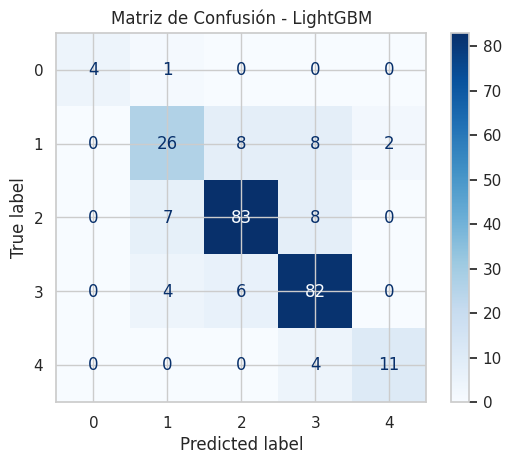

In [ ]:
best_model_name = results_df.sort_values('Test F1', ascending=False).iloc[0]['Model']
best_model = best_models[best_model_name]

# Predicciones
y_pred = best_model.predict(X_test)

# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Blues')
plt.title(f"Matriz de Confusión - {best_model_name}")
plt.show()

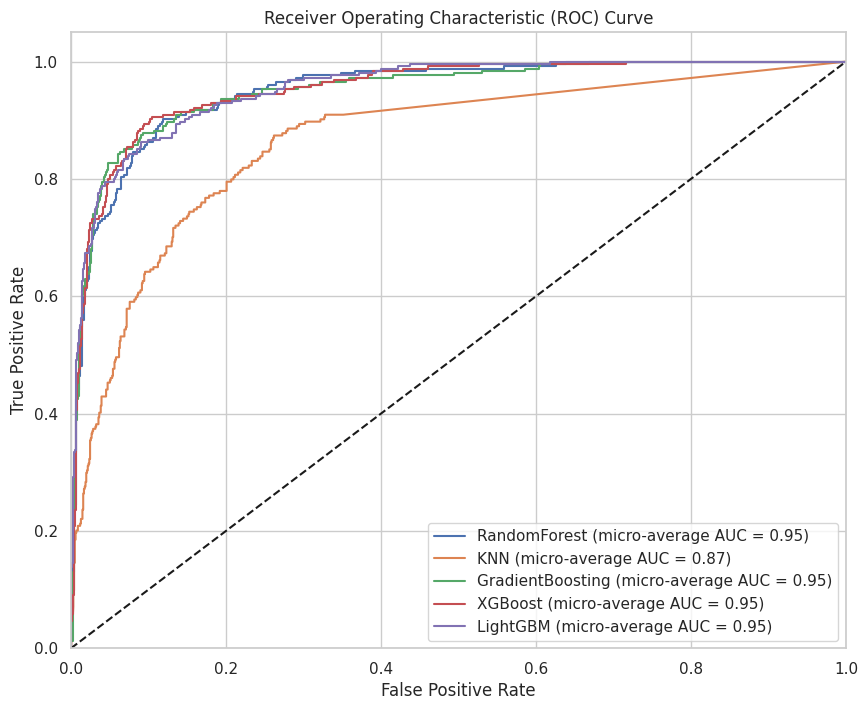

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the output if it's not already
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Crear un gráfico para las curvas ROC
plt.figure(figsize=(10, 8))

for model_name, best_model in best_models.items():
    # Compute probabilities
    y_score = best_model.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curve
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'{model_name} (micro-average AUC = {roc_auc["micro"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##Modelo final no ambulancias (Urgente 1-0)

Este modelo no tendrá todas aquellas features que únicamente se pueden medir en la ambulancia, como a saturación, la presión, la percepción de dolor por parte de un profesional de la salud, etc.

In [ ]:
df_m2 = df.copy()
categorical_columns_m2 = ['Sex', 'Arrival mode', 'Injury', 'Mental', 'Pain','Age_Group', 'Symptom_Category']
numeric_columns_m2 =['Age']

encoder_m2 = LabelEncoder()
df_m2['KTAS_expert_encoded'] = encoder_m2.fit_transform(df_m2['KTAS_expert_global'])

X_m2 = df_m2[categorical_columns_m2 + numeric_columns_m2]
y_m2 = df_m2['KTAS_expert_encoded']

# Dividir los datos en entrenamiento y prueba
X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(X_m2, y_m2, test_size=0.2, random_state=42, stratify=y_m2)

# Pipeline de preprocesamiento
preprocessor_m2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns_m2),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns_m2)
    ]
)

# Lista de modelos y sus hiperparámetros
models_m2 = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__max_depth': [10, 20],
            'model__min_samples_split': [2, 5]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'model__n_neighbors': [3, 5, 7],
            'model__weights': ['uniform', 'distance']
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.01, 0.1],
            'model__max_depth': [3, 5]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'model__n_estimators': [100, 200],
            'model__max_depth': [3, 5],
            'model__learning_rate': [0.01, 0.1]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__num_leaves': [31, 50],
            'model__learning_rate': [0.01, 0.1]
        }
    }
}

In [ ]:
scorers_m2 = {
    'F1': make_scorer(f1_score, average='weighted'),
    'ROC-AUC': make_scorer(roc_auc_score, needs_proba=True, multi_class='ovr')
}

best_models_m2 = {}
results_m2 = []

for model_name, model_info in models_m2.items():
    print(f"Entrenando modelo: {model_name}")
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor_m2),
        ('model', model_info['model'])
    ])

    # GridSearchCV
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=model_info['params'],
        scoring=scorers_m2['F1'],  # Cambiar a otra métrica si se prefiere
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        verbose=1,
        n_jobs=-1
    )
    grid_search.fit(X_train_m2, y_train_m2)

    # Guardar el mejor modelo
    best_models_m2[model_name] = grid_search.best_estimator_

    # Get predicted probabilities
    y_pred_proba_m2 = grid_search.predict_proba(X_test_m2)

    # Use probabilities for the positive class (or the class you want to evaluate)
    # Assuming a binary classification and you are interested in class 1
    y_pred_proba_class1 = y_pred_proba_m2[:, 1]

    results_m2.append({
        'Model': model_name,
        'Best Params': grid_search.best_params_,
        'Train F1': grid_search.best_score_,
        'Test F1': f1_score(y_test_m2, grid_search.predict(X_test_m2), average='weighted'),
        # Changed line to use probabilities for a single class
        'Test ROC-AUC': roc_auc_score(y_test_m2, y_pred_proba_class1, multi_class='ovr')
    })

# Mostrar resultados
results_df_m2 = pd.DataFrame(results_m2)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Entrenando modelo: RandomForest
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Entrenando modelo: KNN
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Entrenando modelo: GradientBoosting
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Entrenando modelo: XGBoost
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:27:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Entrenando modelo: LightGBM
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[LightGBM] [Info] Number of positive: 586, number of negative: 427
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 124
[LightGBM] [Info] Number of data points in the train set: 1013, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.578480 -> initscore=0.316536
[LightGBM] [Info] Start training from score 0.316536
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [ ]:
results_df_m2

,Model,Best Params,Train F1,Test F1,Test ROC-AUC
0,RandomForest,"{'model__max_depth': 20, 'model__min_samples_s...",0.701652,0.736950,0.806917
1,KNN,"{'model__n_neighbors': 7, 'model__weights': 'u...",0.682181,0.680894,0.757804
2,GradientBoosting,"{'model__learning_rate': 0.01, 'model__max_dep...",0.710126,0.715282,0.793439
3,XGBoost,"{'model__learning_rate': 0.01, 'model__max_dep...",0.702320,0.718996,0.793979
4,LightGBM,"{'model__learning_rate': 0.01, 'model__n_estim...",0.699149,0.683095,0.782090


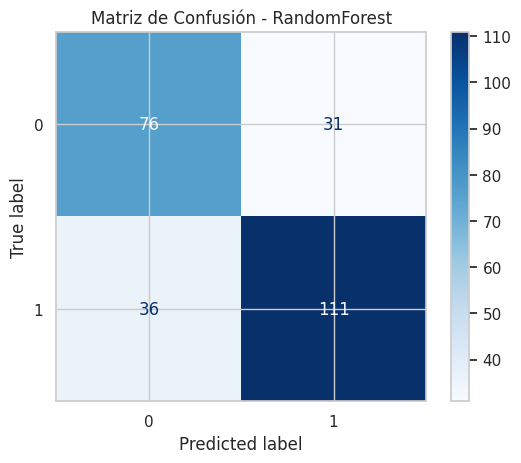

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Visualización de la matriz de confusión para el mejor modelo
best_model_name_m2 = results_df_m2.sort_values('Test F1', ascending=False).iloc[0]['Model']
best_model_m2 = best_models_m2[best_model_name_m2]

# Predicciones
y_pred_m2 = best_model_m2.predict(X_test_m2)

# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(best_model_m2, X_test_m2, y_test_m2, cmap='Blues')
plt.title(f"Matriz de Confusión - {best_model_name_m2}")
plt.show()

En este caso, tanto el Test F1 y el Test ROC-AUC, tienen como mejor modelo el Random Forest

## CONEXIÓN CON EL FORMS

### Función para conectar con el forms

In [ ]:
def transform_data(df, maestro_sintomas_file, storage_client, best_model):
    # Rango de edades
    limites = [0, 18, 35, 55, 75, 100]
    etiquetas = ['Adolescente', 'Joven Adulto', 'Adulto', 'Adulto Mayor', 'Anciano']

    # Grupo de edad
    df['Age_Group'] = pd.cut(df['Age'], bins=limites, labels=etiquetas, right=False)

    # Funciones de categorización
    def categorize_systolic(row):
        age = row['Age']
        gender = row['Sex']
        sbp = row['SBP']

        if gender == "Male":
            if 16 <= age <= 18: low, high = 105, 135
            elif 19 <= age <= 24: low, high = 105, 139
            elif 25 <= age <= 29: low, high = 108, 139
            elif 30 <= age <= 39: low, high = 110, 145
            elif 40 <= age <= 49: low, high = 110, 150
            elif 50 <= age <= 59: low, high = 115, 155
            else: low, high = 115, 160
        elif gender == "Female":
            if 16 <= age <= 18: low, high = 100, 130
            elif 19 <= age <= 24: low, high = 100, 130
            elif 25 <= age <= 29: low, high = 102, 135
            elif 30 <= age <= 39: low, high = 105, 139
            elif 40 <= age <= 49: low, high = 105, 150
            elif 50 <= age <= 59: low, high = 110, 155
            else: low, high = 115, 160

        if sbp < low:
            return 'Hipotensión'
        elif sbp > high:
            return 'Hipertensión'
        else:
            return 'Normal'

    def categorize_diastolic(row):
        age = row['Age']
        gender = row['Sex']
        dbp = row['DBP']

        if gender == "Male":
            if 16 <= age <= 18: low, high = 60, 86
            elif 19 <= age <= 24: low, high = 62, 88
            elif 25 <= age <= 29: low, high = 65, 89
            elif 30 <= age <= 39: low, high = 68, 92
            elif 40 <= age <= 49: low, high = 70, 96
            elif 50 <= age <= 59: low, high = 70, 98
            else: low, high = 70, 100
        elif gender == "Female":
            if 16 <= age <= 18: low, high = 60, 85
            elif 19 <= age <= 24: low, high = 60, 85
            elif 25 <= age <= 29: low, high = 60, 86
            elif 30 <= age <= 39: low, high = 65, 89
            elif 40 <= age <= 49: low, high = 65, 96
            elif 50 <= age <= 59: low, high = 70, 98
            else: low, high = 70, 100

        if dbp < low:
            return 'Hipotensión'
        elif dbp > high:
            return 'Hipertensión'
        else:
            return 'Normal'

    df['New_SBP'] = df.apply(categorize_systolic, axis=1)
    df['New_DBP'] = df.apply(categorize_diastolic, axis=1)

    df.loc[df['HR'] < 60, 'New_HR'] = 'Bradicardia'
    df.loc[(df["HR"] >= 60) & (df["HR"] <= 100), 'New_HR'] = 'Normal'
    df.loc[df['HR'] > 100, 'New_HR'] = 'Taquicardia'

    df.loc[df['RR'] < 12, 'New_RR'] = 'Bradipnea'
    df.loc[(df["RR"] >= 12) & (df["RR"] <= 20), 'New_RR'] = 'Normal'
    df.loc[df['RR'] > 20, 'New_RR'] = 'Taquipnea'

    df.loc[df['BT'] <= 36, 'New_BT'] = 'Hipotermia'
    df.loc[(df["BT"] >= 36.1) & (df["BT"] <= 37.2), 'New_BT'] = 'Normal'
    df.loc[df['BT'] > 37.2, 'New_BT'] = 'Fiebre'

    df.loc[df['NRS_pain'] < 3, 'New_NRS_pain'] = 'Bajo Dolor'
    df.loc[(df["NRS_pain"] >= 3) & (df["NRS_pain"] <= 7), 'New_NRS_pain'] = 'Dolor'
    df.loc[df['NRS_pain'] > 7, 'New_NRS_pain'] = 'Alto Dolor'

    df.loc[df['Saturation'] < 90, 'New_Saturation'] = 'Hipoxemia'
    df.loc[(df["Saturation"] >= 95) & (df["Saturation"] <= 100), 'New_Saturation'] = 'Normal'
    df.loc[(df["Saturation"] >= 90) & (df["Saturation"] < 95), 'New_Saturation'] = 'Bajo Normal'

    # Gestión de síntomas
    bucket = storage_client.get_bucket('df_triage')
    blob = bucket.blob(maestro_sintomas_file)
    try:
        blob.download_to_filename(maestro_sintomas_file)
        maestro_sintomas = pd.read_csv(maestro_sintomas_file)
    except:
        maestro_sintomas = pd.DataFrame(columns=['Chief_complain', 'Symptom_Category'])

    new_complains = df[~df['Chief_complain'].isin(maestro_sintomas['Chief_complain'])]
    if not new_complains.empty:
        new_complains['Symptom_Category'] = new_complains['Chief_complain'].apply(classify_symptom)
        maestro_sintomas = pd.concat([maestro_sintomas, new_complains[['Chief_complain', 'Symptom_Category']]], ignore_index=True)
        maestro_sintomas.to_csv(maestro_sintomas_file, index=False)
        blob.upload_from_filename(maestro_sintomas_file)

    df = df.merge(maestro_sintomas, on='Chief_complain', how='left')

    excluded_columns = ['Marca temporal','DNI','Chief_complain', 'TRIAGE', 'Categoria_problema']
    df_model = df.drop(columns=excluded_columns)
    print(df_model.columns)

    # Asumimos que 'X_train' y 'best_model' están definidos fuera de esta función
    # Preprocesamiento y predicción
    predictions = best_model.predict(df_model)

    return predictions, df_model['Symptom_Category']

### Conexión con el forms

In [ ]:
import time
import gspread
from google.cloud import storage
from google.auth import default
import pandas as pd
from datetime import datetime, timedelta

creds, _ = default()
gc = gspread.authorize(creds)

# Configurar acceso a Google Cloud Storage
client = storage.Client()
bucket_name = 'df_triage'
bucket = client.get_bucket(bucket_name)

# Descargar archivo de casos analizados
processed_file = 'processed_cases.csv'
blob = bucket.blob(processed_file)

try:
    blob.download_to_filename(processed_file)
    processed_df = pd.read_csv(processed_file)
except:
    # Si no existe, comienza con un DataFrame vacío
    processed_df = pd.DataFrame(columns=['DNI'])

# Lista de espera para priorizar los casos
waitlist = pd.DataFrame(columns=['DNI', 'Categoría', 'Prioridad', 'Timestamp'])

# Autorizar y conectar a Google Sheets
creds, _ = default()
gc = gspread.authorize(creds)
spreadsheet = gc.open('Respuestas Triage')

def get_new_cases_df():
    sheet = spreadsheet.sheet1
    data = sheet.get_all_records()
    df_sheet = pd.DataFrame(data)

    # Filtrar casos nuevos
    new_cases_df = df_sheet[~df_sheet['DNI'].isin(processed_df['DNI'])]

    if not new_cases_df.empty:
        # Renombrar las columnas en el DataFrame
        new_cases_df = new_cases_df.rename(columns={
            'Sexo': 'Sex',
            'Presión Arterial Diastólica': 'DBP',
            'Presión Arterial Sistólica': 'SBP',
            'Frecuencia Cardíaca': 'HR',
            'Frecuencia Respiratoria': 'RR',
            'Temperatura Corporal': 'BT',
            'Resumen del problema': 'Chief_complain',
            'Escala de dolor': 'NRS_pain',
            'Mental state': 'Mental',
            'Saturación de Oxígeno': 'Saturation'
        })
    return new_cases_df, df_sheet

def update_waitlist(dni, categoria, prioridad):
    """Agregar un caso a la lista de espera"""
    current_time = datetime.now()
    new_entry = pd.DataFrame([{'DNI': dni, 'Categoría': categoria, 'Prioridad': prioridad, 'Timestamp': current_time}])
    global waitlist
    waitlist = pd.concat([waitlist, new_entry], ignore_index=True)

def prioritize_waitlist():
    """Actualizar la lista de espera considerando el tiempo de espera y prioridad"""
    current_time = datetime.now()
    waitlist['WaitTime'] = current_time - waitlist['Timestamp']
    waitlist['WaitTimeMinutes'] = waitlist['WaitTime'].apply(lambda x: x.total_seconds() / 60)

    # Lógica para promover según el tiempo de espera
    waitlist.loc[(waitlist['Prioridad'] >= 3) & (waitlist['WaitTimeMinutes'] > 5), 'Prioridad'] = 0.5

    # Ordenar por prioridad y tiempo de espera
    waitlist.sort_values(by=['Prioridad', 'WaitTimeMinutes'], inplace=True)

    # Eliminar columnas temporales
    return waitlist.drop(columns=['WaitTime', 'WaitTimeMinutes'])

def update_waitlist_sheet():
    """Escribir la lista de espera en una nueva hoja."""
    try:
        waitlist_sheet = spreadsheet.worksheet("Lista de Espera")
    except gspread.exceptions.WorksheetNotFound:
        # Si no existe, crea una nueva hoja
        waitlist_sheet = spreadsheet.add_worksheet(title="Lista de Espera", rows="100", cols="20")

    # Limpiar la hoja antes de actualizar
    waitlist_sheet.clear()

    # Convertir todo el DataFrame a cadena para operación segura
    waitlist_converted = waitlist.copy()
    waitlist_converted['Timestamp'] = waitlist_converted['Timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
    waitlist_converted = waitlist_converted.astype(str)

    # Escribir la lista de espera agrupada por categoría
    start_row = 1
    for categoria in waitlist_converted['Categoría'].unique():
        category_cases = waitlist_converted[waitlist_converted['Categoría'] == categoria]
        # Escribir encabezado de la categoría
        waitlist_sheet.update_cell(start_row, 1, f"Categoría: {categoria}")
        start_row += 1
        # Escribir datos de los pacientes
        waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())
        start_row += len(category_cases) + 3  # Mover dos filas adicionales más para agregar espacio entre categorías

# Bucle que revisa nuevas filas
while True:
    new_cases_df, df_sheet = get_new_cases_df()

    if not new_cases_df.empty:
        for index, row in new_cases_df.iterrows():
            print(f"Procesando fila con DNI: {row['DNI']}")
            case_row = new_cases_df[new_cases_df['DNI'] == row['DNI']]
            prediction_value = transform_data(case_row, 'MAESTRO_SINTOMAS.csv', client, best_model)

            new_row = pd.DataFrame([{'DNI': row['DNI']}])
            processed_df = pd.concat([processed_df, new_row], ignore_index=True)
            processed_df.to_csv(processed_file, index=False)
            blob.upload_from_filename(processed_file)

            sheet = gc.open('Respuestas Triage').sheet1
            gsheet_index = df_sheet.index[df_sheet['DNI'] == row['DNI']][0] + 2
            prediction_column = 'TRIAGE'
            column_index = df_sheet.columns.get_loc(prediction_column) + 1
            sheet.update_cell(gsheet_index, column_index, int(prediction_value[0]))

            prediction_column = 'Categoria_problema'
            column_index = df_sheet.columns.get_loc(prediction_column) + 1
            sheet.update_cell(gsheet_index, column_index, prediction_value[1].item())

            update_waitlist(row['DNI'], prediction_value[1].item(), int(prediction_value[0]))

        print("Nuevas filas procesadas y hoja actualizada.")

    prioritized_list = prioritize_waitlist()
    update_waitlist_sheet()
    print("Lista de espera priorizada:")
    print(prioritized_list.to_string(index=False))

    print("Esperando 5 segundos antes de revisar nuevamente...")
    time.sleep(5)  # Espera 5 segundos

Procesando fila con DNI: 542543
Index(['Sex', 'Age', 'Arrival mode', 'Pain', 'Injury', 'Mental', 'DBP', 'SBP',
       'HR', 'RR', 'BT', 'NRS_pain', 'Saturation', 'Age_Group', 'New_SBP',
       'New_DBP', 'New_HR', 'New_RR', 'New_BT', 'New_NRS_pain',
       'New_Saturation', 'Symptom_Category'],
      dtype='object')


<ipython-input-182-278851be72f7>:127: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sheet.update_cell(gsheet_index, column_index, int(prediction_value[0]))
<ipython-input-182-278851be72f7>:133: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  update_waitlist(row['DNI'], prediction_value[1].item(), int(prediction_value[0]))
<ipython-input-182-278851be72f7>:64: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat oper

Nuevas filas procesadas y hoja actualizada.


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious         3 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


<ipython-input-182-278851be72f7>:105: DeprecationWarning: The order of arguments in worksheet.update() has changed. Please pass values first and range_name secondor used named arguments (range_name=, values=)
  waitlist_sheet.update(f"A{start_row}", [category_cases.columns.values.tolist()] + category_cases.values.tolist())


Lista de espera priorizada:
   DNI  Categoría Prioridad                  Timestamp
542543 Infectious       0.5 2024-11-28 22:11:12.476088
Esperando 5 segundos antes de revisar nuevamente...


In [ ]:
#Este es el código viejo, lo dejo por las dudas
'''
import time
import gspread
from google.cloud import storage
from google.auth import default
import pandas as pd

# Configurar acceso a Google Cloud Storage
client = storage.Client()
bucket_name = 'df_triage'
bucket = client.get_bucket(bucket_name)

# Descargar archivo de casos analizados
processed_file = 'processed_cases.csv'
blob = bucket.blob(processed_file)

try:
    blob.download_to_filename(processed_file)
    processed_df = pd.read_csv(processed_file)
except:
    # Si no existe, comienza con un DataFrame vacío
    processed_df = pd.DataFrame(columns=['DNI'])

# Función para leer datos de Google Sheets
def get_new_cases_df():
    # Autorizar y conectar a Google Sheets
    creds, _ = default()
    gc = gspread.authorize(creds)
    spreadsheet = gc.open('Respuestas Triage')
    sheet = spreadsheet.sheet1
    data = sheet.get_all_records()
    df_sheet = pd.DataFrame(data)

    # Filtrar casos nuevos
    new_cases_df = df_sheet[~df_sheet['DNI'].isin(processed_df['DNI'])]

    if not new_cases_df.empty:
        # Renombrar las columnas en el DataFrame
        new_cases_df = new_cases_df.rename(columns={
            'Sexo': 'Sex',
            'Presión Arterial Diastólica': 'DBP',
            'Presión Arterial Sistólica': 'SBP',
            'Frecuencia Cardíaca': 'HR',
            'Frecuencia Respiratoria': 'RR',
            'Temperatura Corporal': 'BT',
            'Resumen del problema': 'Chief_complain',
            'Escala de dolor': 'NRS_pain',
            'Mental state': 'Mental',
            'Saturación de Oxígeno': 'Saturation'
        })
    return new_cases_df, df_sheet

# Bucle que revisa nuevas filas
while True:
    new_cases_df, df_sheet = get_new_cases_df()

    if not new_cases_df.empty:
        # Procesar nuevos casos
        for index, row in new_cases_df.iterrows():
            print(f"Procesando fila con DNI: {row['DNI']}")  # Imprimir el DNI de la fila actual
            case_row = new_cases_df[new_cases_df['DNI'] == row['DNI']]
            prediction_value = transform_data(case_row, 'MAESTRO_SINTOMAS.csv', storage_client, best_model)

            # Actualizar el archivo de casos procesados
            new_row = pd.DataFrame([{'DNI': row['DNI']}])
            processed_df = pd.concat([processed_df, new_row], ignore_index=True)
            processed_df.to_csv(processed_file, index=False)
            blob.upload_from_filename(processed_file)

            # Actualizar el Google Sheet
            sheet = gc.open('Respuestas Triage').sheet1
            gsheet_index = df_sheet.index[df_sheet['DNI'] == row['DNI']][0] + 2
            prediction_column = 'TRIAGE'
            column_index = df_sheet.columns.get_loc(prediction_column) + 1
            sheet.update_cell(gsheet_index, column_index, int(prediction_value[0]))

            # Actualizar el Google Sheet
            sheet = gc.open('Respuestas Triage').sheet1
            gsheet_index = df_sheet.index[df_sheet['DNI'] == row['DNI']][0] + 2
            prediction_column = 'Categoria_problema'
            column_index = df_sheet.columns.get_loc(prediction_column) + 1
            sheet.update_cell(gsheet_index, column_index, prediction_value[1].item())

        print("Nuevas filas procesadas y hoja actualizada.")
    else:
        print("No se encontraron nuevas filas.")

    print("Esperando 5 segundos antes de revisar nuevamente...")
    time.sleep(5)  # Es

'''

##Red neuronal

In [ ]:
!pip install scikeras

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Función para crear el modelo
def create_nn_model(neurons=32, optimizer='adam', input_shape=None):
    # input_shape will be provided during fit
    model = Sequential()
    model.add(Dense(neurons, input_shape=input_shape, activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(5, activation='softmax'))  # 5 clases
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Crear el modelo KerasClassifier
nn_model = KerasClassifier(
    model=create_nn_model,  # Pass the function, not the result
    neurons=32,  # Valor inicial
    optimizer='adam',
    batch_size=32,
    epochs=20,
    verbose=0
)

# Assuming 'numeric_columns' and 'categorical_columns' are defined
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', nn_model)
])

# Get the input shape after preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
input_shape = X_train_preprocessed.shape[1:] # Exclude the batch size dimension

# Set the input shape parameter of the KerasClassifier
nn_model.set_params(**{'model__input_shape': input_shape}) # Update the KerasClassifier params

# Entrenar el modelo usando el pipeline
pipeline.fit(X_train, y_train)

# Evaluar el modelo and calculate F1 scores
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Print F1 scores
print(f"Train F1 Score: {f1_train}")
print(f"Test F1 Score: {f1_test}")

##Más EDA post Creación de variables

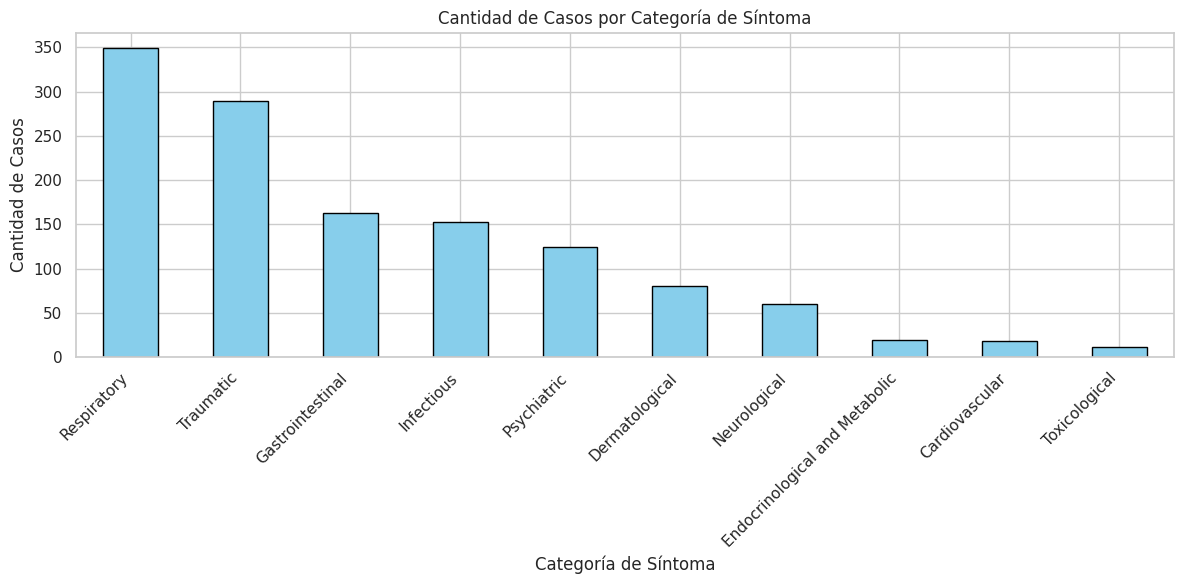

In [ ]:
# Conteo de casos por categoría de síntoma
case_counts = df['Symptom_Category'].value_counts()

plt.figure(figsize=(12, 6))
case_counts.plot(
    kind='bar',
    color='skyblue',
    edgecolor='black'
)
plt.title('Cantidad de Casos por Categoría de Síntoma')
plt.ylabel('Cantidad de Casos')
plt.xlabel('Categoría de Síntoma')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


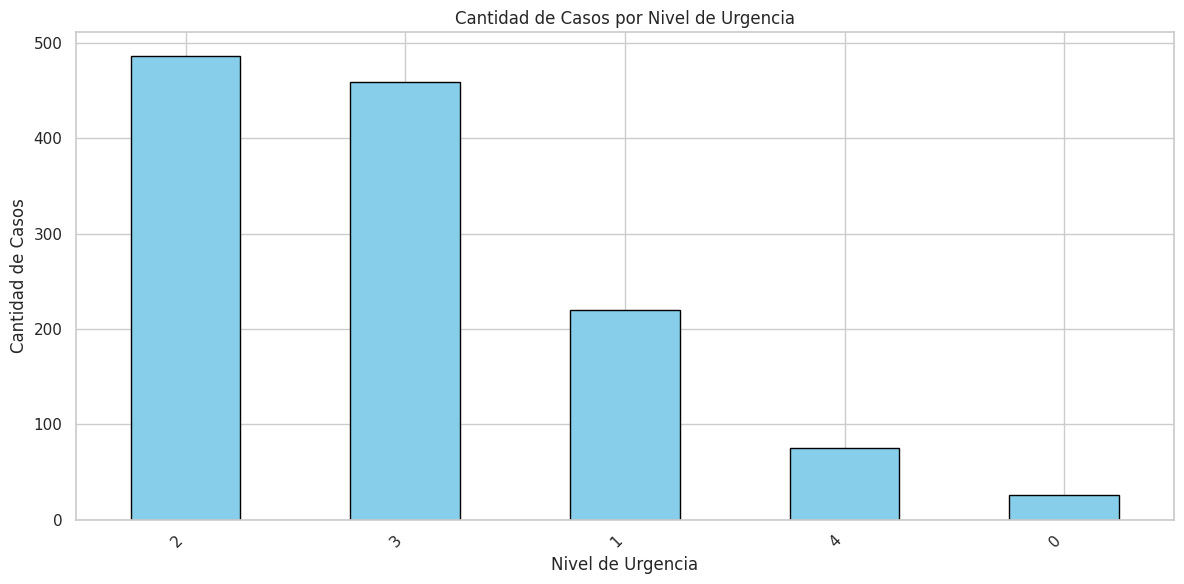

In [ ]:
case_counts = df['KTAS_encoded'].value_counts()

plt.figure(figsize=(12, 6))
case_counts.plot(
    kind='bar',
    color='skyblue',
    edgecolor='black'
)
plt.title('Cantidad de Casos por Nivel de Urgencia')
plt.ylabel('Cantidad de Casos')
plt.xlabel('Nivel de Urgencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

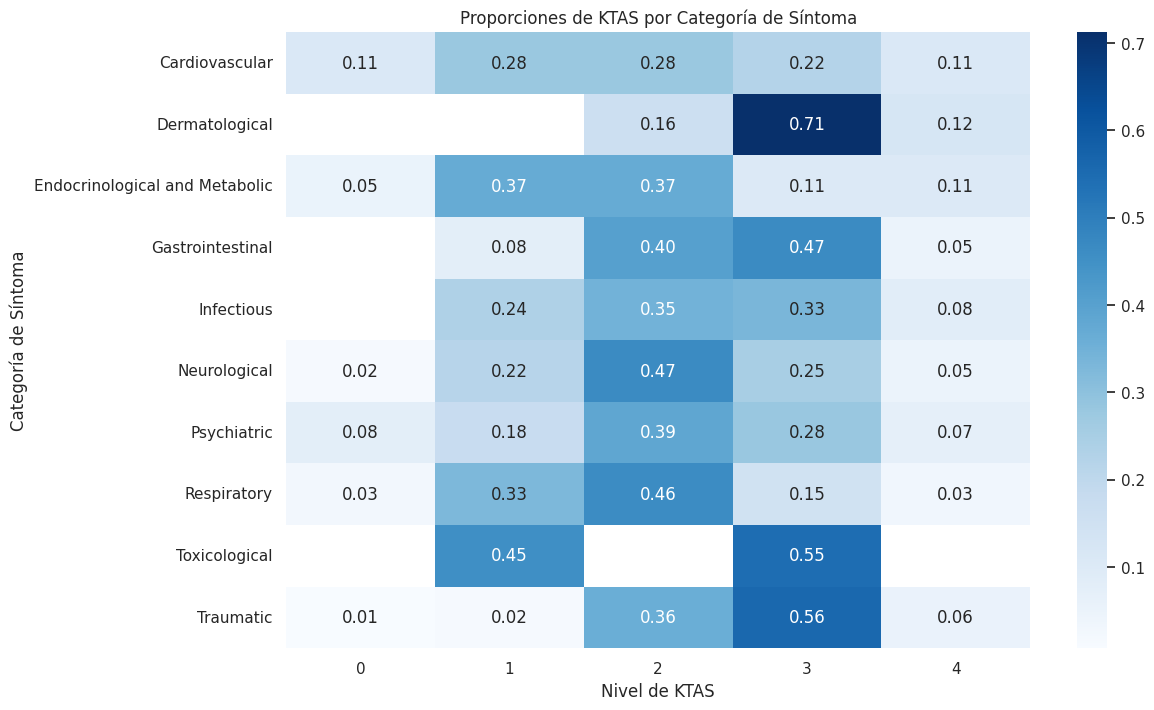

In [ ]:
import seaborn as sns
sns.set_style("white")

ktas_symptom_proportions = df.groupby('Symptom_Category')['KTAS_encoded'].value_counts(normalize=True).unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(ktas_symptom_proportions, annot=True, cmap='Blues', fmt='.2f',linewidths=0, linecolor='white')
plt.title('Proporciones de KTAS por Categoría de Síntoma')
plt.ylabel('Categoría de Síntoma')
plt.xlabel('Nivel de KTAS')
plt.show()


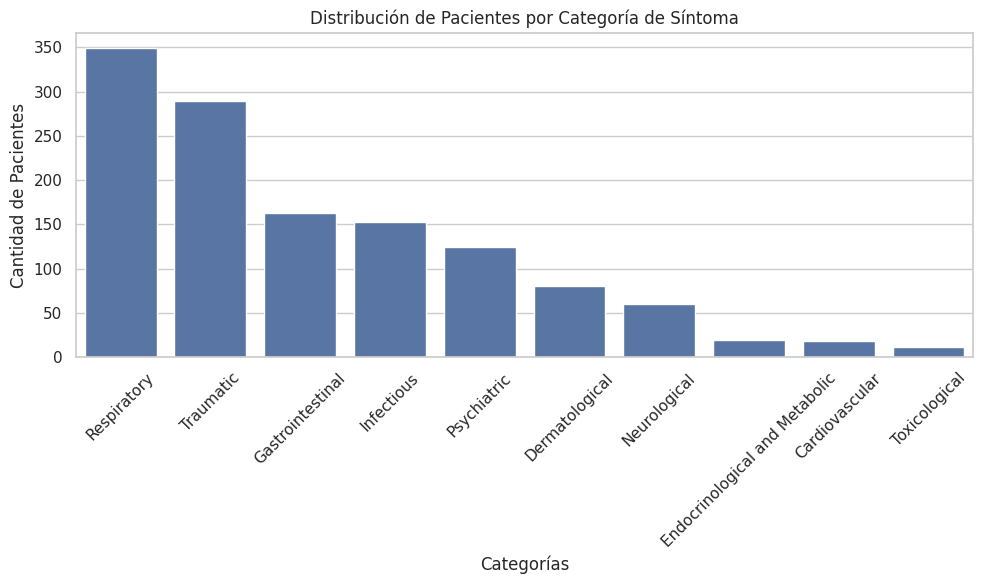

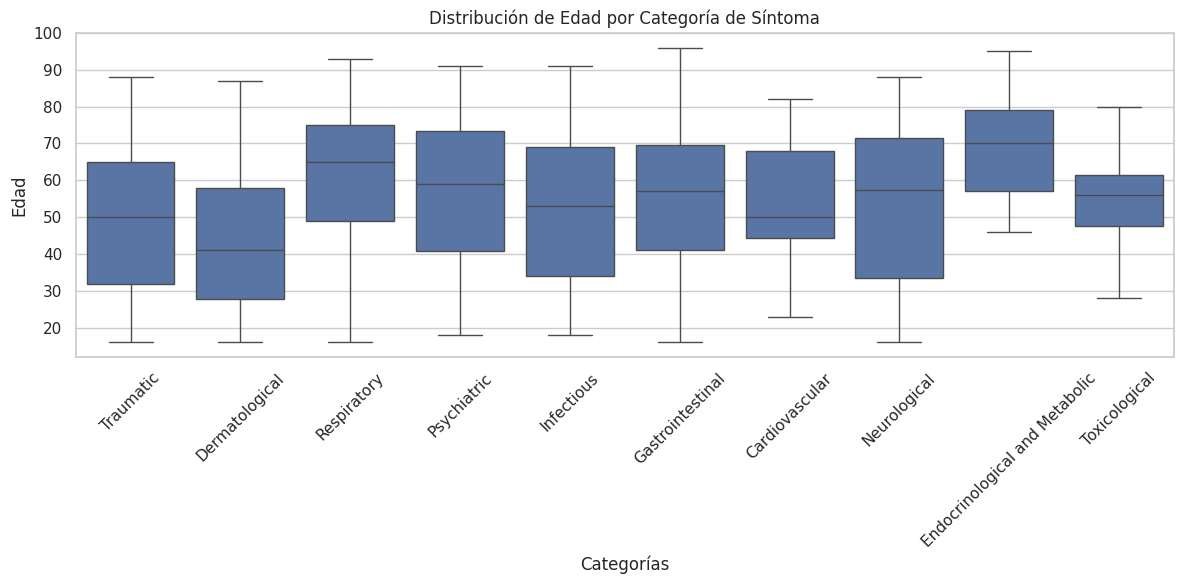

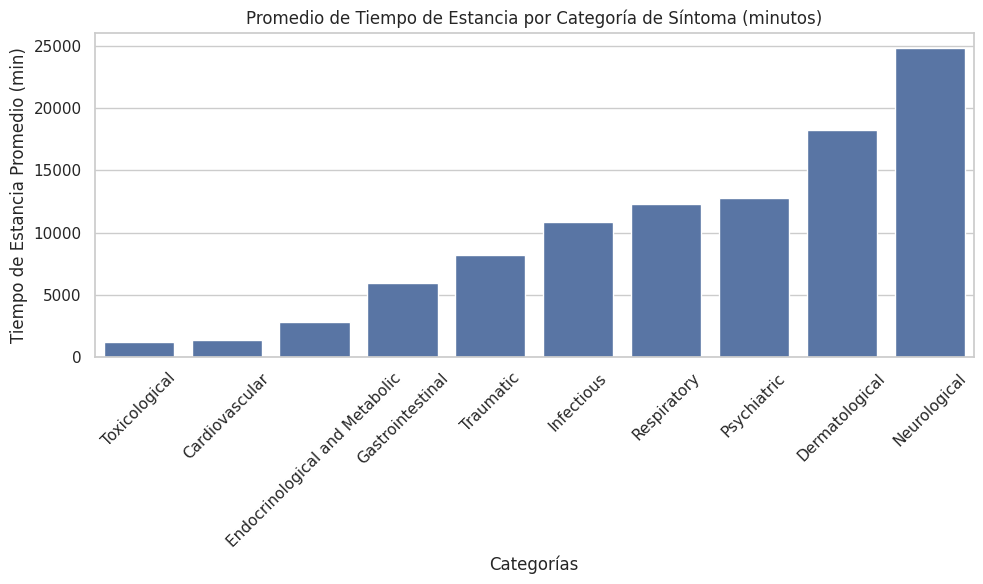

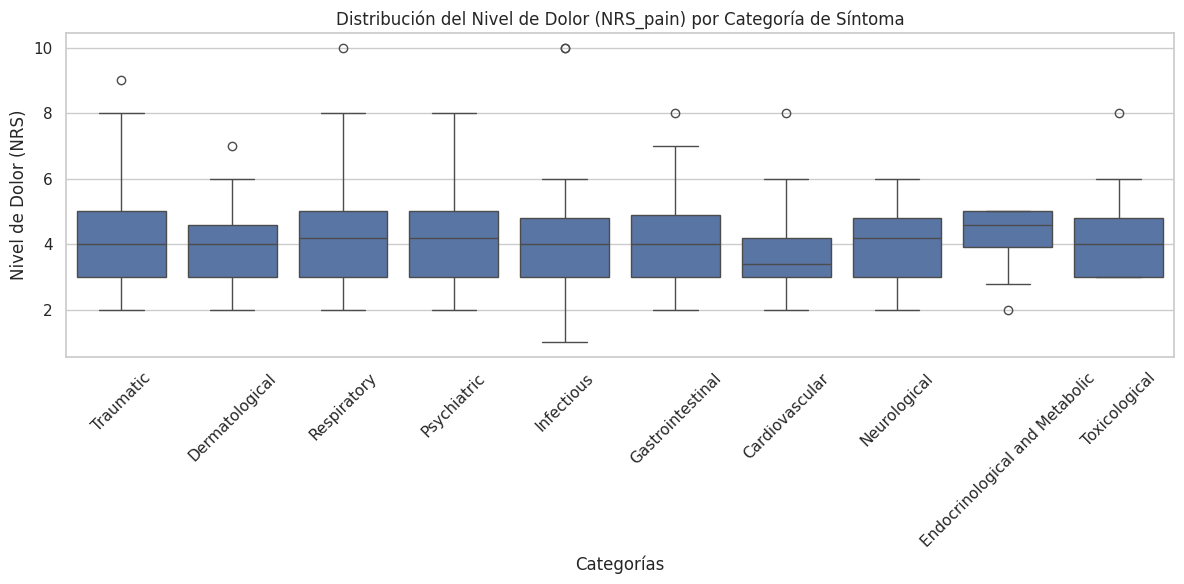

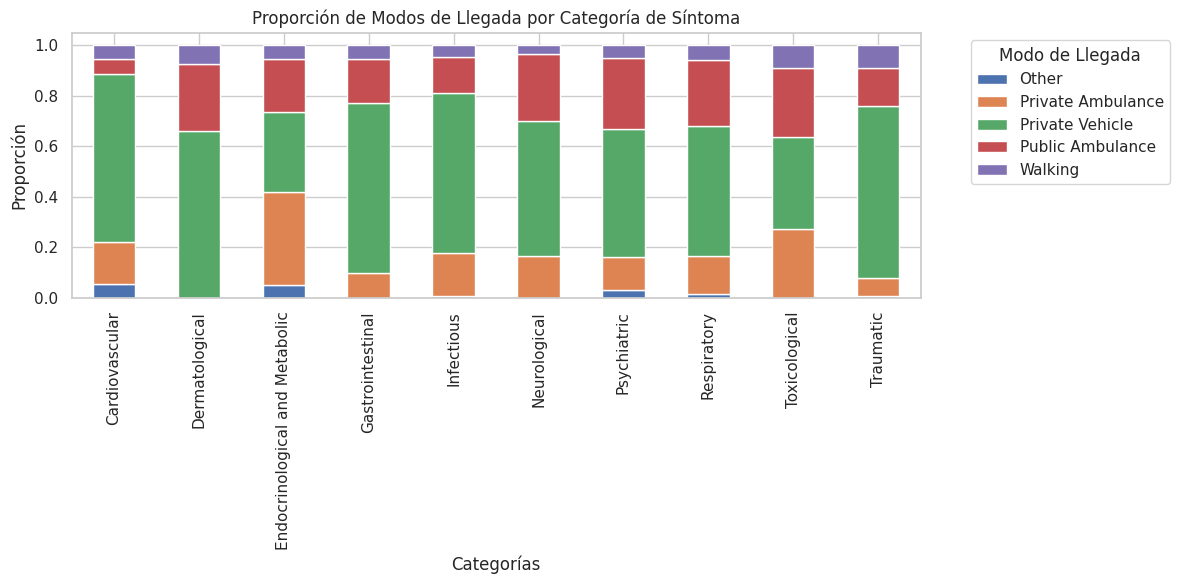

ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
# 1. Distribución de categorías en 'Symptom_Category'
category_counts = df['Symptom_Category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribución de Pacientes por Categoría de Síntoma')
plt.xlabel('Categorías')
plt.ylabel('Cantidad de Pacientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Distribución de la edad según categoría de síntoma
plt.figure(figsize=(12, 6))
sns.boxplot(x='Symptom_Category', y='Age', data=df)
plt.title('Distribución de Edad por Categoría de Síntoma')
plt.xlabel('Categorías')
plt.ylabel('Edad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Promedio del tiempo de estancia por categoría de síntoma
avg_length_of_stay = df.groupby('Symptom_Category')['Length of stay_min'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_length_of_stay.index, y=avg_length_of_stay.values)
plt.title('Promedio de Tiempo de Estancia por Categoría de Síntoma (minutos)')
plt.xlabel('Categorías')
plt.ylabel('Tiempo de Estancia Promedio (min)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Relación entre el nivel de dolor (NRS_pain) y las categorías de síntomas
plt.figure(figsize=(12, 6))
sns.boxplot(x='Symptom_Category', y='NRS_pain', data=df)
plt.title('Distribución del Nivel de Dolor (NRS_pain) por Categoría de Síntoma')
plt.xlabel('Categorías')
plt.ylabel('Nivel de Dolor (NRS)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Modo de llegada (Arrival mode) según categoría de síntoma
arrival_mode_counts = df.groupby('Symptom_Category')['Arrival mode'].value_counts(normalize=True).unstack()
arrival_mode_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Proporción de Modos de Llegada por Categoría de Síntoma')
plt.xlabel('Categorías')
plt.ylabel('Proporción')
plt.legend(title='Modo de Llegada', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Generación del análisis para visualizar al usuario
import ace_tools as tools; tools.display_dataframe_to_user(name="EDA Resumen por Categoría de Síntoma", dataframe=df.groupby('Symptom_Category').mean())

In [ ]:
df["KTAS duration_min"].describe()

,KTAS duration_min
count,1267.000000
mean,5.249408
std,3.329127
min,1.000000
25%,3.000000
50%,4.000000
75%,7.000000
max,17.000000


In [ ]:
ktas_by_specialty= df.groupby("Symptom_Category")["KTAS duration_min"].mean().sort_values()
ktas_by_specialty

,KTAS duration_min
Symptom_Category,
Neurological,4.766667
Respiratory,4.816619
Cardiovascular,4.833333
Infectious,5.084967
Traumatic,5.286207
Psychiatric,5.612903
Gastrointestinal,5.656442
Toxicological,5.909091
Dermatological,6.037500


In [ ]:
df["Symptom_Category"].value_counts()

,count
Symptom_Category,
Respiratory,349
Traumatic,290
Gastrointestinal,163
Infectious,153
Psychiatric,124
Dermatological,80
Neurological,60
Endocrinological and Metabolic,19
Cardiovascular,18


##Pseudonanonimización

In [ ]:
import hashlib

# Función para generar el hash (pseudoanonimización)
def generate_hash(value, salt="your_secret_salt"):
    """
    Genera un hash seguro usando SHA-256.
    value: Dato único del paciente (e.g., número de seguro social).
    salt: Clave secreta para agregar seguridad.
    """
    hash_object = hashlib.sha256((value + salt).encode())
    return hash_object.hexdigest()

# Ejemplo de datos
patient_data = {
    'PatientID': '12345',
    'Name': 'John Doe',
    'Age': 34,
    'Diagnosis': 'Hypertension',
    'Length_of_stay': 120
}

# Generar hash para PseudoID
pseudo_id = generate_hash(patient_data['PatientID'])
pseudoanonimized_data = {
    'PseudoID': pseudo_id,
    'Age': patient_data['Age'],
    'Diagnosis': patient_data['Diagnosis'],
    'Length_of_stay': patient_data['Length_of_stay']
}

# Guardar datos pseudoanonimizados
print("Pseudoanonimized Data:", pseudoanonimized_data)


Pseudoanonimized Data: {'PseudoID': '7cf5aa3adbf6bcd2b35cc26f2d2d9f939a920e63f711ce3fffdae037bdcea350', 'Age': 34, 'Diagnosis': 'Hypertension', 'Length_of_stay': 120}


In [ ]:
# Tabla Pseudonimizada
pseudonymized_table = {
    'PseudoID': pseudo_id,
    'Age': patient_data['Age'],
    'Diagnosis': patient_data['Diagnosis'],
    'Length_of_stay': patient_data['Length_of_stay']
}

# Tabla de Identificación (almacenada de manera segura)
identification_table = {
    'PseudoID': pseudo_id,
    'PatientID': patient_data['PatientID'],
    'Name': patient_data['Name']
}

print("Pseudonymized Table:", pseudonymized_table)
print("Identification Table (Stored Securely):", identification_table)


Pseudonymized Table: {'PseudoID': '7cf5aa3adbf6bcd2b35cc26f2d2d9f939a920e63f711ce3fffdae037bdcea350', 'Age': 34, 'Diagnosis': 'Hypertension', 'Length_of_stay': 120}
Identification Table (Stored Securely): {'PseudoID': '7cf5aa3adbf6bcd2b35cc26f2d2d9f939a920e63f711ce3fffdae037bdcea350', 'PatientID': '12345', 'Name': 'John Doe'}


In [ ]:
# Función de desanonimización
def desanonimize(pseudo_id, secure_table, salt="your_secret_salt"):
    """
    Busca el ID original utilizando la tabla de identificación segura.
    pseudo_id: Hash generado para un paciente.
    secure_table: Tabla de identificación segura.
    salt: Clave secreta usada durante la pseudoanonimización.
    """
    for record in secure_table:
        generated_id = generate_hash(record['PatientID'], salt)
        if generated_id == pseudo_id:
            return record
    return None

# Probar desanonimización
secure_table = [{'PatientID': '12345', 'Name': 'John Doe'}]  # Ejemplo
original_data = desanonimize(pseudo_id, secure_table)
print("Desanonimized Data:", original_data)


Desanonimized Data: {'PatientID': '12345', 'Name': 'John Doe'}


In [ ]:
from cryptography.fernet import Fernet

# Generar clave de encriptación
key = Fernet.generate_key()
cipher_suite = Fernet(key)

# Encriptar un dato sensible
encrypted_name = cipher_suite.encrypt(patient_data['Name'].encode())
print("Encrypted Name:", encrypted_name)

# Desencriptar el dato
decrypted_name = cipher_suite.decrypt(encrypted_name).decode()
print("Decrypted Name:", decrypted_name)


Encrypted Name: b'gAAAAABnSK6wGPZ9diP73S-vpbQrBiPcTTtJp5ZltLcIx6pAtEu1EcphQye1Mos0DzWBsH7kpxC3W3LuLk4uV0eWiyTQuvTr0A=='
Decrypted Name: John Doe


Este proceso permite proteger la identidad del paciente al trabajar con sus datos sensibles, garantizando la privacidad y el cumplimiento de normativas éticas y legales, como la HIPAA o el GDPR, sin perder la capacidad de vincular información en caso de reingreso.

Resumen del Proceso

1. Pseudoanonimización:
- Se utiliza una función de hash seguro (SHA-256) para generar un identificador único llamado PseudoID, basado en información específica del paciente, como su ID original.
- Este identificador reemplaza los datos sensibles del paciente, lo que asegura que los registros no puedan ser directamente asociados con una persona sin un mecanismo de desanonimización.

2. Separación de Tablas:
- Tabla Pseudoanonimizada: Contiene el PseudoID y la información médica (e.g., diagnóstico, estancia).
- Tabla de Identificación: Almacena el PseudoID junto con datos sensibles (e.g., nombre, ID original). Esta tabla se guarda de forma segura para minimizar el riesgo de acceso no autorizado.

3. Desanonimización:
- En caso de necesitar identificar nuevamente a un paciente (por ejemplo, si reingresa), se utiliza la misma función de hash para buscar su información en la tabla de identificación segura. Esto permite restaurar el vínculo entre el PseudoID y los datos originales.

4. Encriptación Adicional:
- Para proteger columnas particularmente sensibles, como el nombre del paciente, se aplica encriptación con la biblioteca cryptography. Esto añade una capa extra de seguridad.